# ML Sales Forecasting - Time Series
Exploring Machine Learning (ML) models for sales forecasting. Putting a focus on using time service principles and algorithms.

## Initialize

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/walmart-dataset/Walmart.csv


## Load Dataset

In [2]:
# load dataset into a dataframe
walmart_df = pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv")
# print dataframe source
print(walmart_df.shape)

(6435, 8)


## Data Preprocessing

In [3]:
# view the data
walmart_df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
# check data types
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


* `Date` column should be converted to `datetime` data type.

### Check duplicates and missing values

In [5]:
# check duplicates
walmart_df.duplicated().sum()
# no need drop

0

In [6]:
# check missing values
walmart_df.isnull().sum() 
# no need to fill

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Transform

In [7]:
# preference - for consistency make all columns uppercase 
walmart_df.columns = walmart_df.columns.str.upper()

# display new columns
walmart_df.columns

Index(['STORE', 'DATE', 'WEEKLY_SALES', 'HOLIDAY_FLAG', 'TEMPERATURE',
       'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT'],
      dtype='object')

In [8]:
# Convert 'Date_String' column to actual 'Date' format
#walmart_df['DATE'] = pd.to_datetime(walmart_df['DATE'], format='%d-%m-%Y')
walmart_df['DATE'] = pd.to_datetime(walmart_df['DATE'])

# Extract Year, Month, and Weekday into new separate columns
walmart_df['YEAR'] = walmart_df['DATE'].dt.year
walmart_df['MONTH'] = walmart_df['DATE'].dt.month
walmart_df['WEEKDAY'] = walmart_df['DATE'].dt.dayofweek
walmart_df['QUARTER'] = walmart_df['DATE'].dt.quarter
walmart_df['DAYOFYEAR'] = walmart_df['DATE'].dt.dayofyear
walmart_df['WEEKOFYEAR'] = walmart_df['DATE'].dt.isocalendar().week

# Drop the original 'Date' column
# walmart_df.drop(columns=['DATE'], inplace=True)

# view updated data
walmart_df = walmart_df.sort_values(by='DATE')
walmart_df

STORE       DATE  WEEKLY_SALES  HOLIDAY_FLAG  TEMPERATURE  FUEL_PRICE  \
606       5 2010-01-10     283178.12             0        71.10       2.603   
2036     15 2010-01-10     566945.95             0        59.69       2.840   
5897     42 2010-01-10     481523.93             0        86.01       3.001   
4610     33 2010-01-10     224294.39             0        91.45       3.001   
5039     36 2010-01-10     422169.47             0        74.66       2.567   
...     ...        ...           ...           ...          ...         ...   
5860     41 2012-12-10    1409544.97             0        39.38       3.760   
2285     16 2012-12-10     491817.19             0        43.26       3.760   
1427     10 2012-12-10    1713889.11             0        76.03       4.468   
3572     25 2012-12-10     697317.41             0        43.74       4.000   
283       2 2012-12-10    1900745.13             0        60.97       3.601   

             CPI  UNEMPLOYMENT  YEAR  MONTH  WEEKDAY  QUARTER  DAYOFYEAR  \
606   212.226946         6.768  2010      1        6        1         10   
2036  132.756800         8.067  2010      1        6        1         10   
5897  126.234600         9.003  2010      1        6        1         10   
4610  126.234600         9.265  2010      1        6        1         10   
5039  210.440443         8.476  2010      1        6        1         10   
...          ...           ...   ...    ...      ...      ...        ...   
5860  199.053937         6.195  2012     12        0        4        345   
2285  199.053937         5.847  2012     12        0        4        345   
1427  131.108333         6.943  2012     12        0        4        345   
3572  216.115057         7.293  2012     12        0        4        345   
283   223.015426         6.170  2012     12        0        4        345   

      WEEKOFYEAR  
606            1  
2036           1  
5897           1  
4610           1  
5039           1  
...          ...  
5860          50  
2285          50  
1427          50  
3572          50  
283           50  

[6435 rows x 14 columns]

In [9]:
# summary statistics
walmart_df.describe()

STORE  WEEKLY_SALES  HOLIDAY_FLAG  TEMPERATURE   FUEL_PRICE  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  UNEMPLOYMENT         YEAR        MONTH      WEEKDAY  \
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000   
mean    171.578394      7.999151  2010.965035     6.475524     3.573427   
std      39.356712      1.875885     0.797019     3.321797     1.426581   
min     126.064000      3.879000  2010.000000     1.000000     0.000000   
25%     131.735000      6.891000  2010.000000     4.000000     4.000000   
50%     182.616521      7.874000  2011.000000     6.000000     4.000000   
75%     212.743293      8.622000  2012.000000     9.000000     4.000000   
max     227.232807     14.313000  2012.000000    12.000000     6.000000   

           QUARTER    DAYOFYEAR  WEEKOFYEAR  
count  6435.000000  6435.000000      6435.0  
mean      2.496503   181.608392        26.0  
std       1.083165   101.514857   14.511794  
min       1.000000     4.000000         1.0  
25%       2.000000    96.000000        14.0  
50%       2.000000   181.000000        26.0  
75%       3.000000   267.000000        38.0  
max       4.000000   365.000000        52.0

### Visualize

Weekly sales distribution

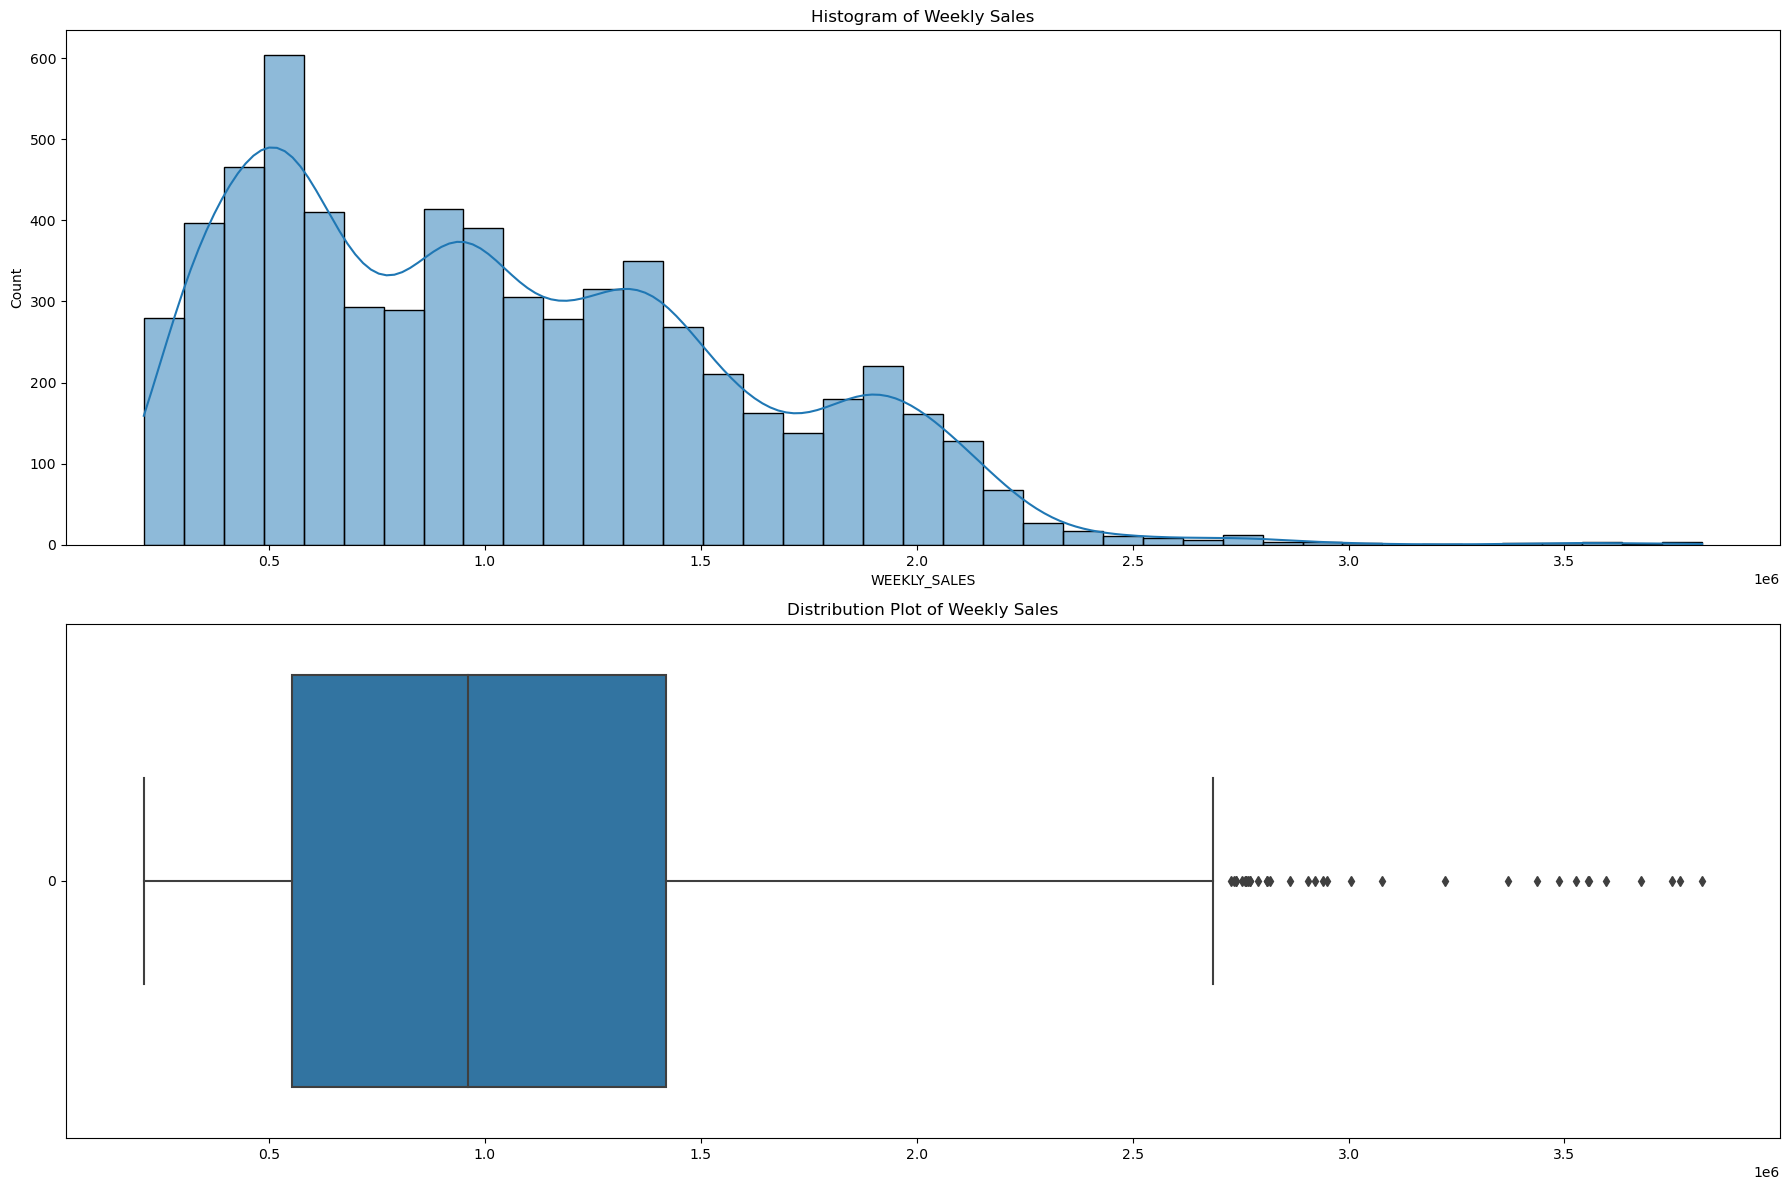

In [10]:
# Viz weekly sales frequency distribution
fig, axes = plt.subplots(2,1, figsize=(18, 12))

# histogram
sns.histplot(walmart_df['WEEKLY_SALES'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Weekly Sales')
# boxplot
sns.boxplot(walmart_df['WEEKLY_SALES'], ax=axes[1],orient='h')
axes[1].set_title('Distribution Plot of Weekly Sales')

# Adjust the layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

Explore more details on the outliers

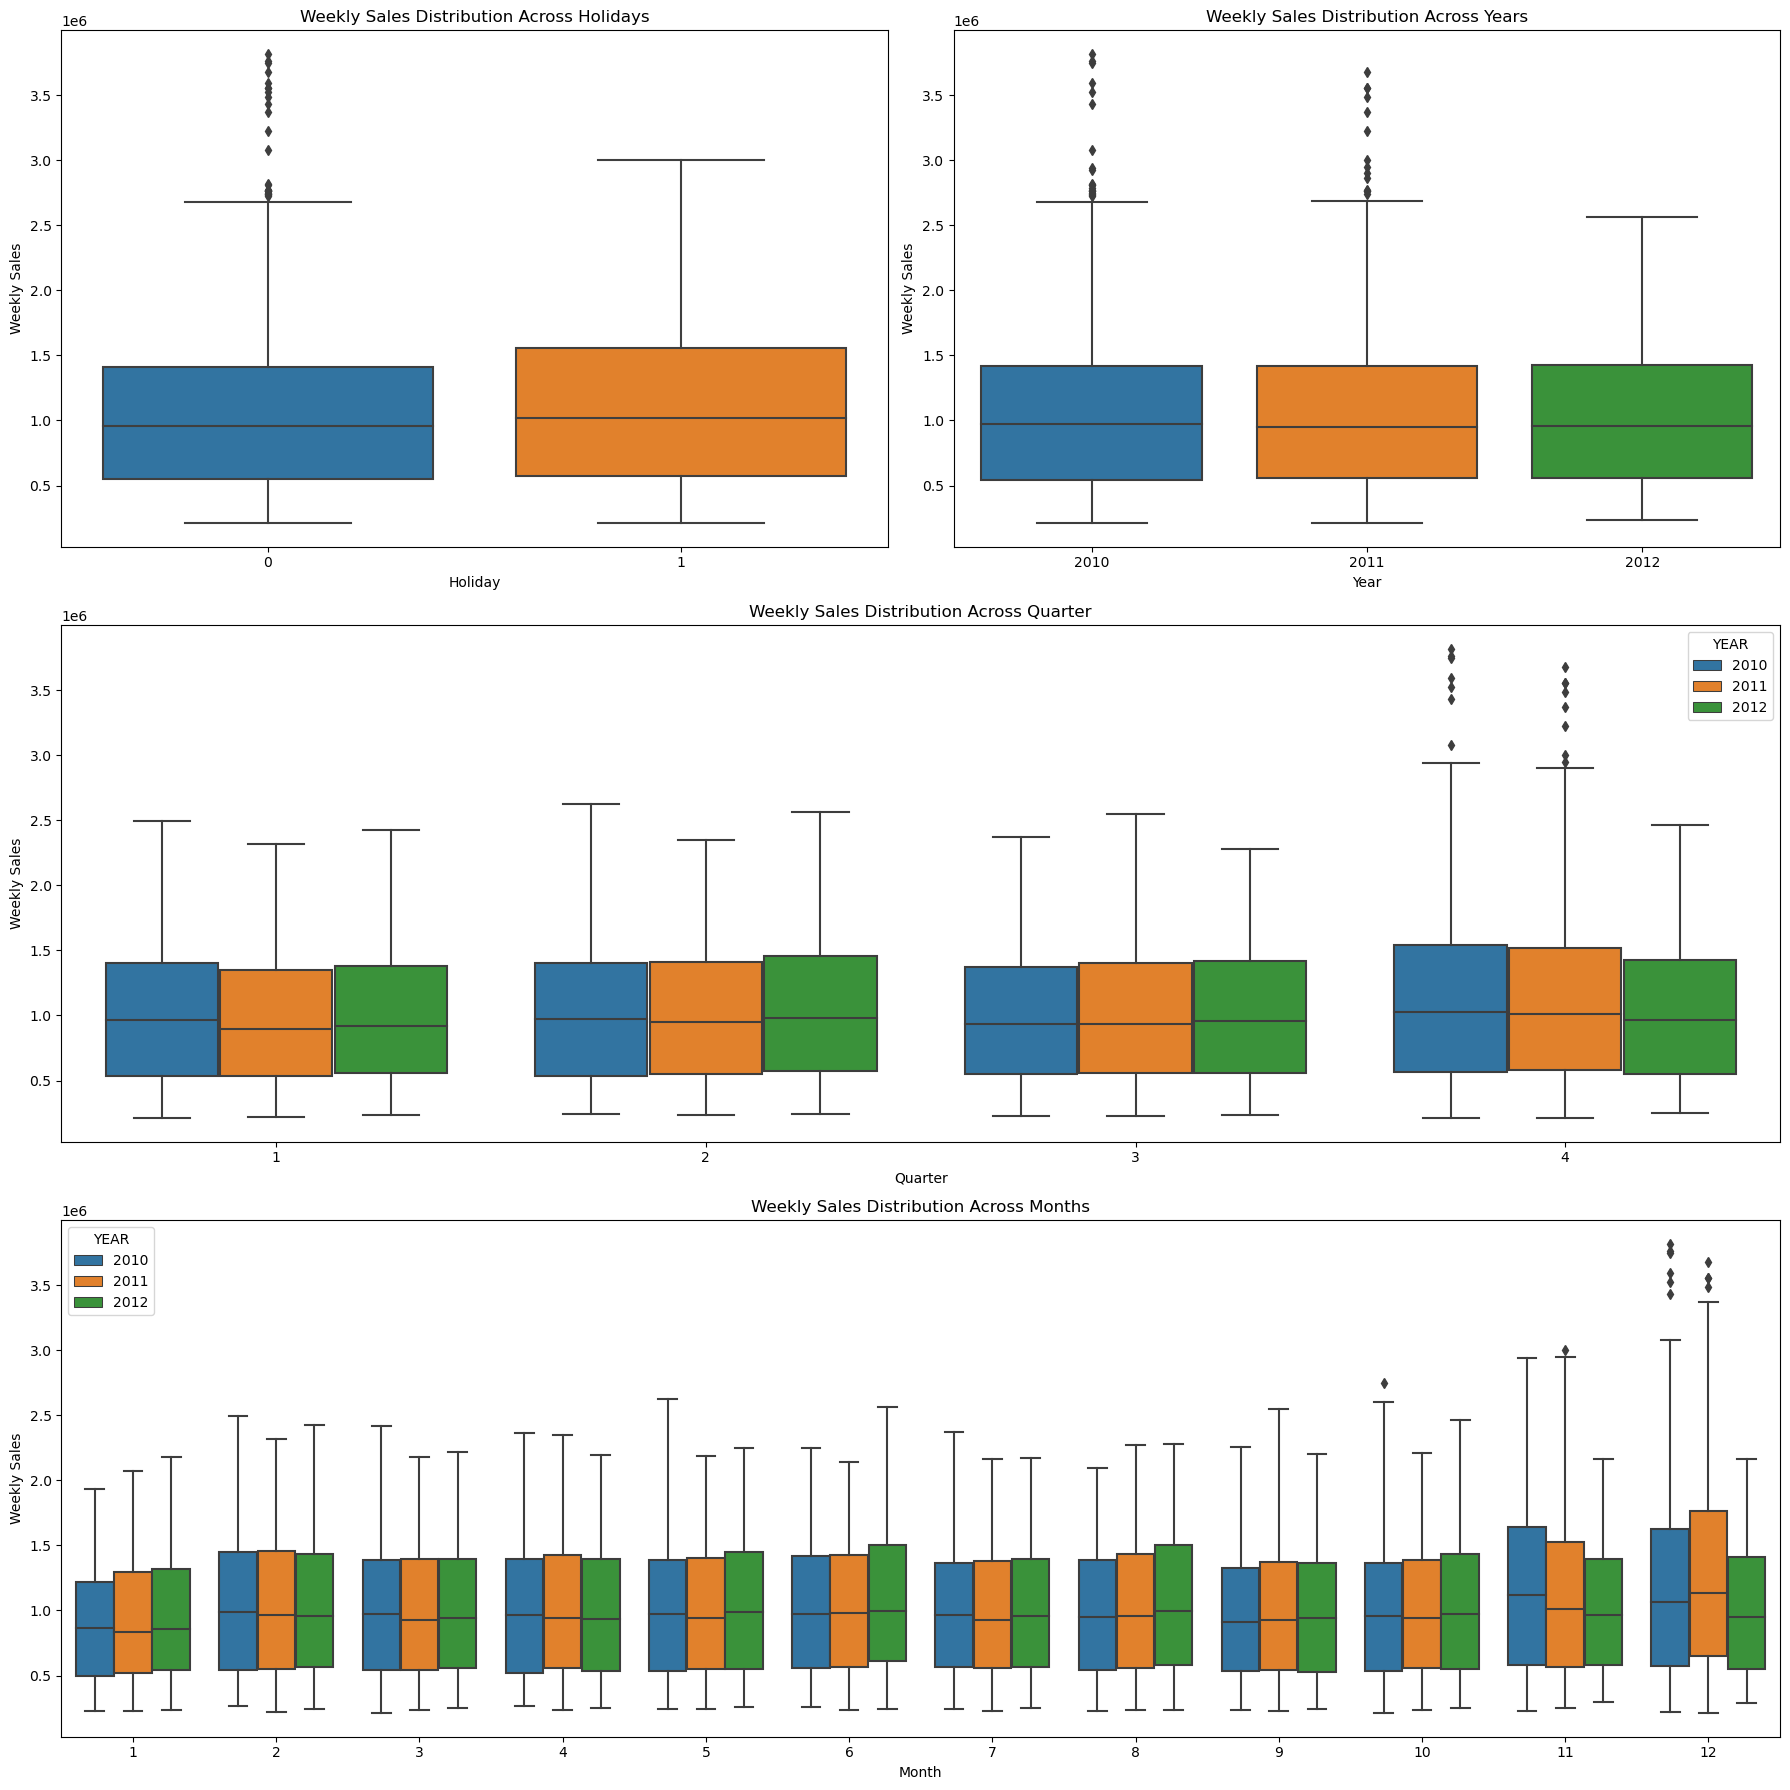

In [11]:
fig = plt.figure(figsize=(18, 18))

# Define the grid layout (3 rows, 2 columns)
grid_spec = (3, 2)

# Create the first two subplots with custom spans
ax1 = plt.subplot2grid(grid_spec, (0, 0))
ax2 = plt.subplot2grid(grid_spec, (0, 1))

# Box plot 'Holiday'
sns.boxplot(data=walmart_df, x='HOLIDAY_FLAG', y='WEEKLY_SALES', ax=ax1)
ax1.set_title('Weekly Sales Distribution Across Holidays')
ax1.set_xlabel('Holiday')
ax1.set_ylabel('Weekly Sales')

# Box plot 'Year'
sns.boxplot(data=walmart_df, x='YEAR', y='WEEKLY_SALES', ax=ax2)
ax2.set_title('Weekly Sales Distribution Across Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Weekly Sales')

# Create a subplot that spans both columns of the second row
ax3 = plt.subplot2grid(grid_spec, (1, 0), colspan=2)

# Box plot 'Months'
sns.boxplot(data=walmart_df, x='QUARTER', y='WEEKLY_SALES', hue='YEAR', ax=ax3)
ax3.set_title('Weekly Sales Distribution Across Quarter')
ax3.set_xlabel('Quarter')
ax3.set_ylabel('Weekly Sales')

# Create a subplot that spans both columns of the third row
ax4 = plt.subplot2grid(grid_spec, (2, 0), colspan=2)

# Box plot 'Months'
sns.boxplot(data=walmart_df, x='MONTH', y='WEEKLY_SALES', hue='YEAR', ax=ax4)
ax4.set_title('Weekly Sales Distribution Across Months')
ax4.set_xlabel('Month')
ax4.set_ylabel('Weekly Sales')

# Adjust the layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

Explore sales data point count by different periods

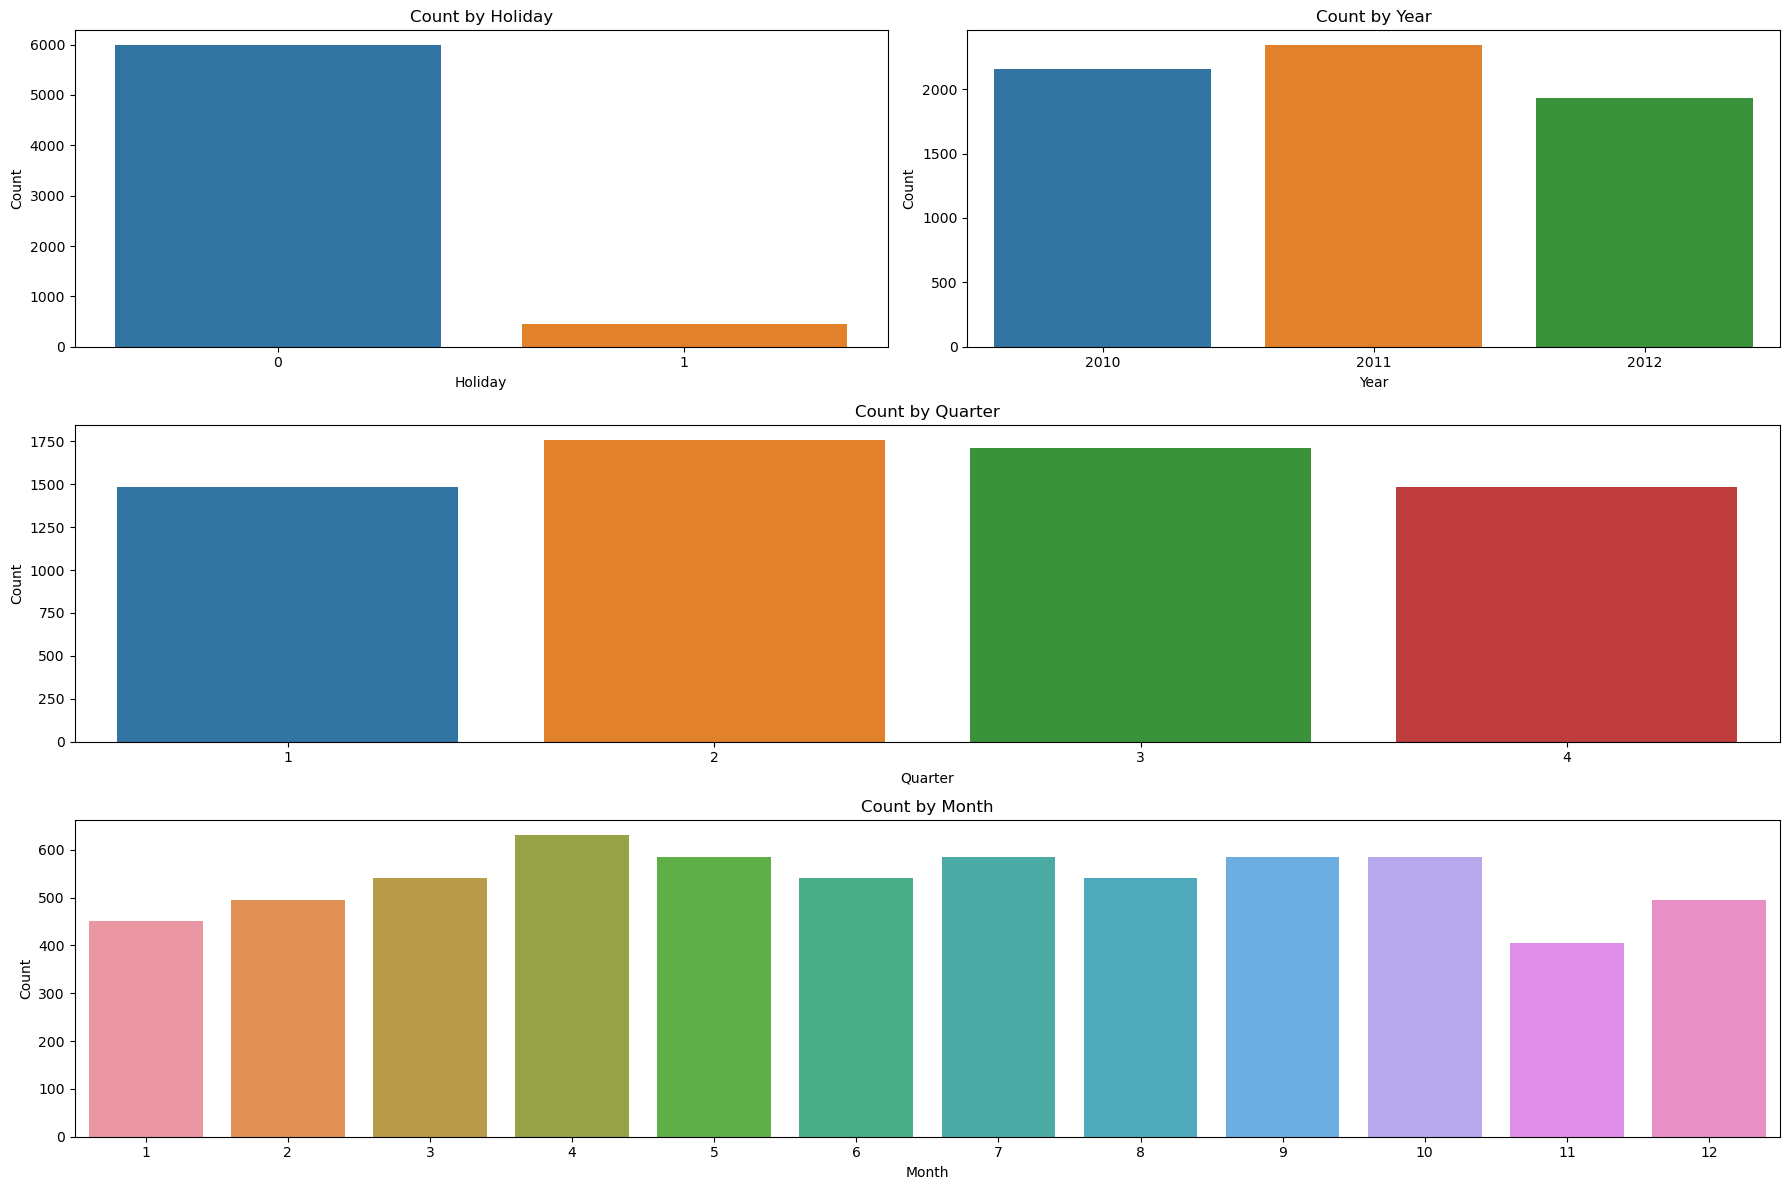

In [12]:
fig = plt.figure(figsize=(18, 12))

# Define the grid layout (3 rows, 2 columns)
grid_spec = (3, 2)

# Create the first two subplots with custom spans
ax1 = plt.subplot2grid(grid_spec, (0, 0))
ax2 = plt.subplot2grid(grid_spec, (0, 1))

# Box plot 'Year'
sns.countplot(data=walmart_df, x='HOLIDAY_FLAG', ax=ax1)
ax1.set_title('Count by Holiday')
ax1.set_xlabel('Holiday')
ax1.set_ylabel('Count')

# Box plot 'Quarter'
sns.countplot(data=walmart_df, x='YEAR', ax=ax2)
ax2.set_title('Count by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')

# Create a subplot that spans both columns of the second row
ax3 = plt.subplot2grid(grid_spec, (1, 0), colspan=2)

# Box plot 'Months'
sns.countplot(data=walmart_df, x='QUARTER', ax=ax3)
ax3.set_title('Count by Quarter')
ax3.set_xlabel('Quarter')
ax3.set_ylabel('Count')

# Create a subplot that spans both columns of the third row
ax4 = plt.subplot2grid(grid_spec, (2, 0), colspan=2)

# Box plot 'Months'
sns.countplot(data=walmart_df, x='MONTH', ax=ax4)
ax4.set_title('Count by Month')
ax4.set_xlabel('Month')
ax4.set_ylabel('Count')

# Adjust the layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

In [13]:
# define function
def hist_box_plot(df, columns):
    """
    Plot both histogram (row 1) and boxplot (row 2)
    """
    plot_columns = columns
    num_columns = len(plot_columns)
    num_rows = 2
        
    # Create a grid for subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))

    # Plot histograms for each column in the first row of the grid
    for i, col in enumerate(plot_columns):
        if num_columns == 1:
            sns.histplot(data=df, x=col, kde=True, ax=axes[0])
            axes[0].set_title(f'Histogram - {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')        
        else:
            sns.histplot(data=df, x=col, kde=True, ax=axes[0, i])
            axes[0, i].set_title(f'Histogram - {col}')
            axes[0, i].set_xlabel(col)
            axes[0, i].set_ylabel('Frequency')

    # Plot box plots for each column in the second row of the grid
    for i, col in enumerate(plot_columns):
        if num_columns == 1:
            sns.boxplot(data=df, y=col, ax=axes[1])
            axes[1].set_title(f'Box Plot - {col}')
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('')            
        else:
            sns.boxplot(data=df, y=col, ax=axes[1, i])
            axes[1, i].set_title(f'Box Plot - {col}')
            axes[1, i].set_xlabel(col)
            axes[1, i].set_ylabel('')

    # Adjust the layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

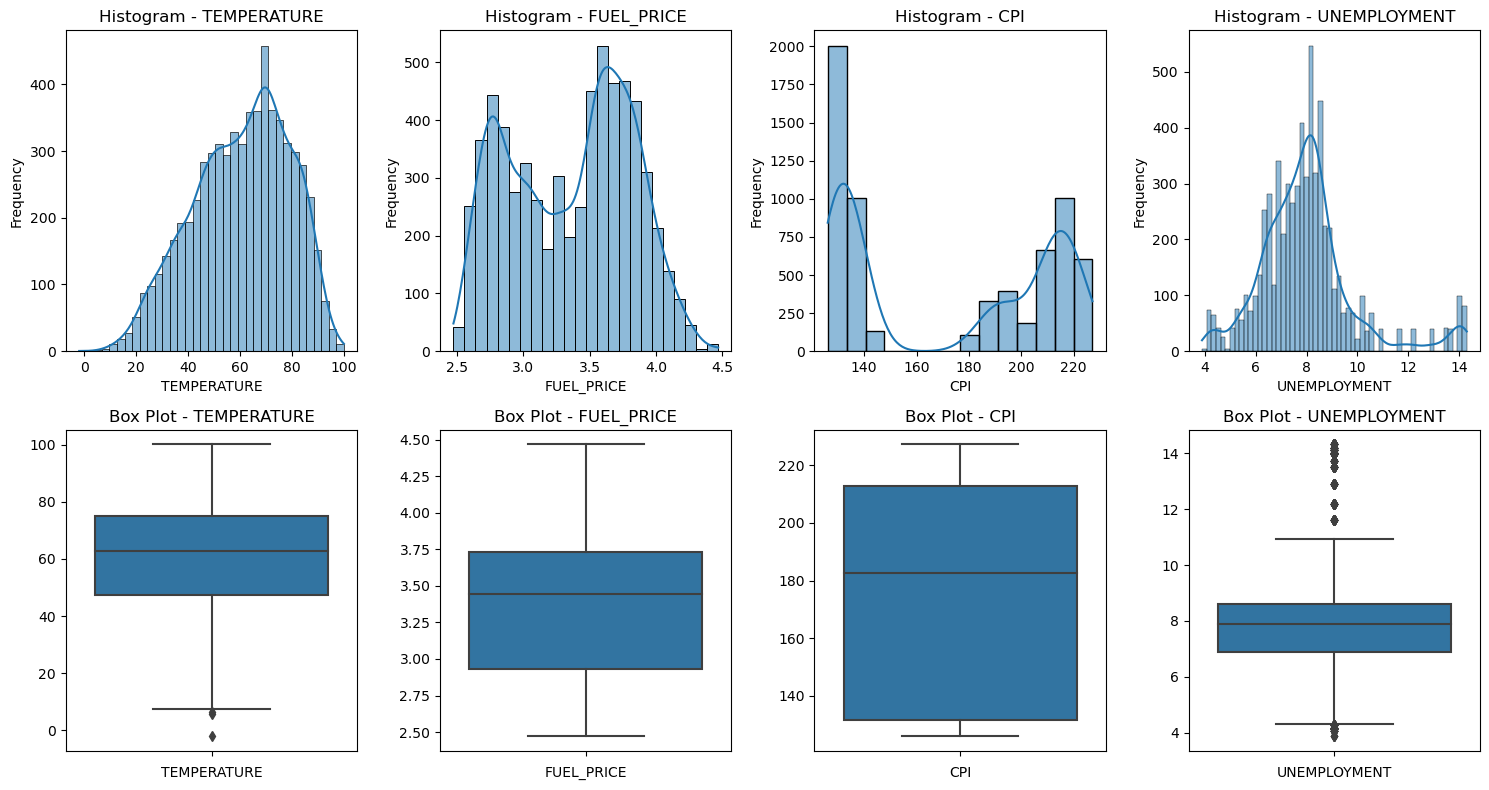

In [14]:
# histogram and boxplot
hist_box_plot(walmart_df, ['TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT'])

We can see outliers on the data, particulary for `WEEKLY_SALES` and `UNEMPLOYMENT`.    
But without additional information behind those outliers, there is not strong reason to remove them.

### Handle outliers

In [15]:
# create function
def remove_outliers(df, column):
    """
    Remove outliers from the specified column in the DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [16]:
# copy data, new dataframe will be used to store data without outliers (ol).
walmart_df_no_ol = walmart_df.copy()

# removed outliers on WEEKLY_SALES
walmart_df_no_ol = remove_outliers(walmart_df_no_ol, 'WEEKLY_SALES')
# removed outliers on WEEKLY_SALES and 'UNEMPLOYMENT'
walmart_df_no_ol = remove_outliers(walmart_df_no_ol, 'UNEMPLOYMENT')


In [17]:
print(walmart_df.shape)
print(walmart_df_no_ol.shape)

(6435, 14)
(5920, 14)


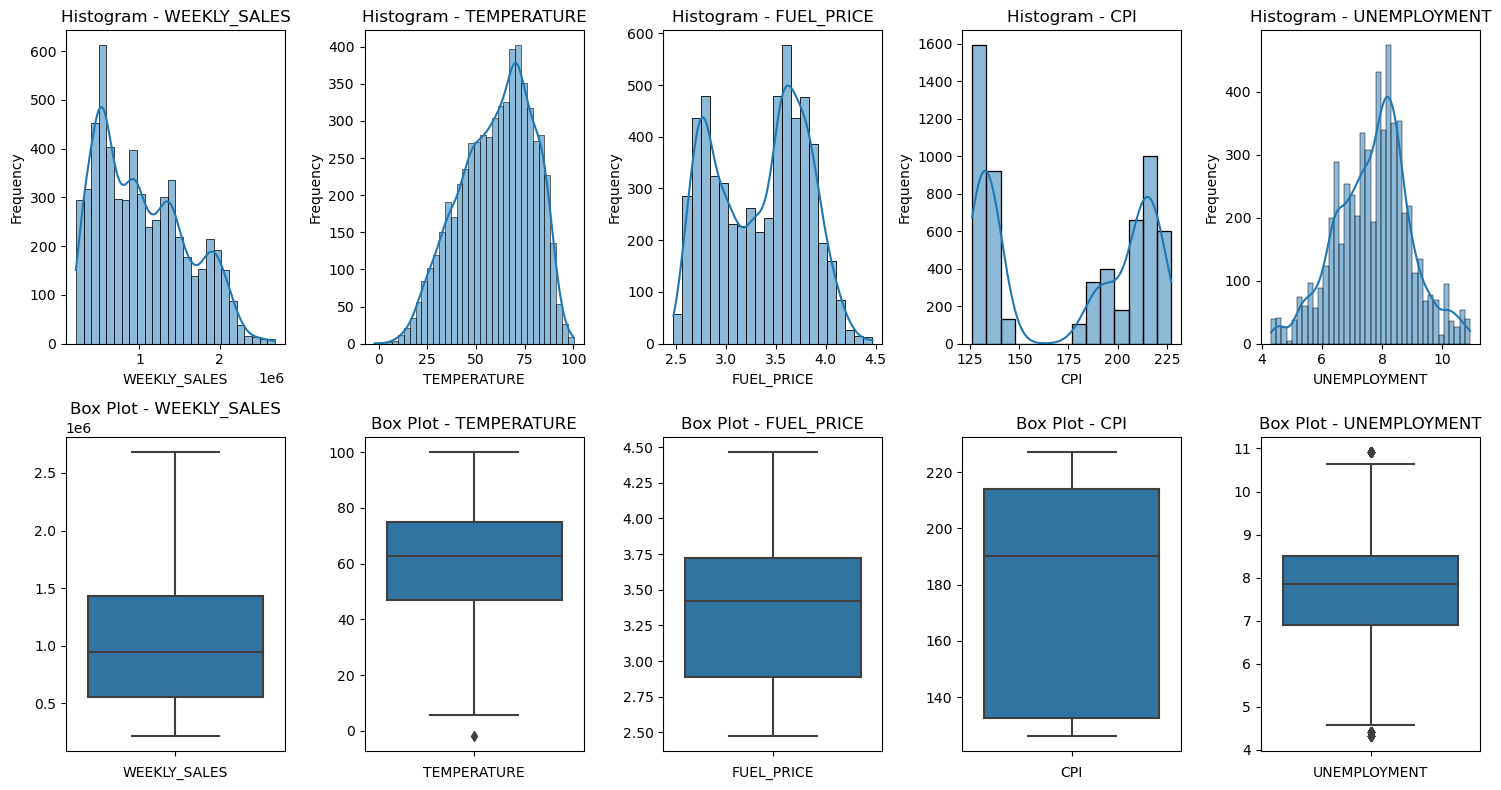

In [18]:
# check distributions - without outliers
# histogram and boxplot
hist_box_plot(walmart_df_no_ol, ['WEEKLY_SALES', 'TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT'])

### Trends and Seasonality

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
walmart_df.set_index('DATE', inplace=True)
walmart_df_no_ol.set_index('DATE', inplace=True)

# Reset the index to make 'DATE' a regular column again
walmart_df.reset_index(inplace=True)
walmart_df_no_ol.reset_index(inplace=True)

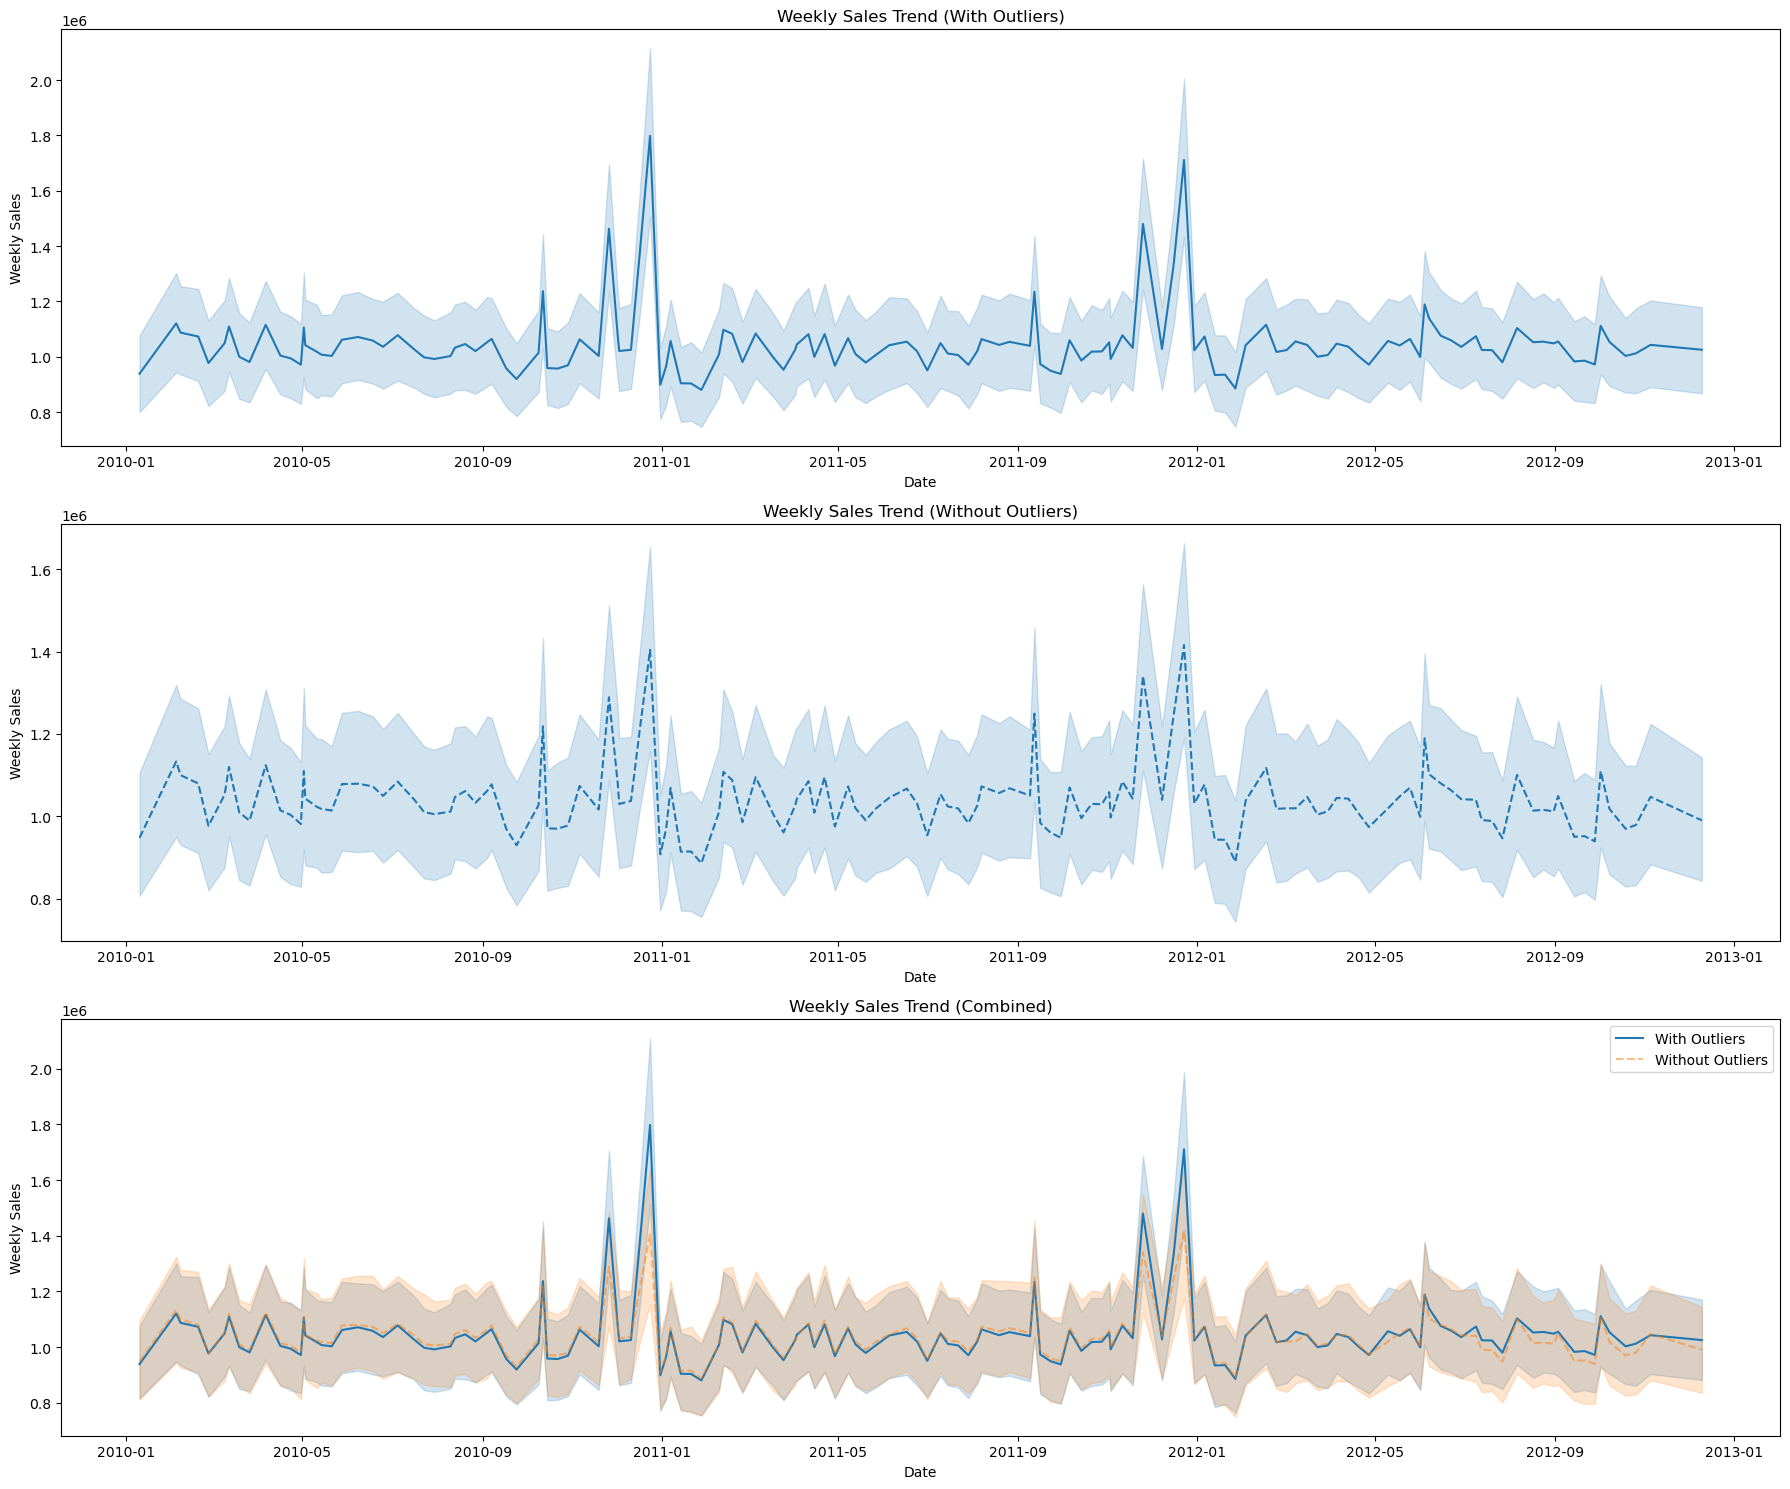

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(18, 15))

# Plot for walmart_df (Main DataFrame)
sns.lineplot(data=walmart_df, x='DATE', y='WEEKLY_SALES', linestyle='-', ax=axes[0])
axes[0].set_title('Weekly Sales Trend (With Outliers)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Weekly Sales')

# Plot for walmart_df_no_ol (DataFrame without outliers)
sns.lineplot(data=walmart_df_no_ol, x='DATE', y='WEEKLY_SALES', linestyle='--', ax=axes[1])
axes[1].set_title('Weekly Sales Trend (Without Outliers)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Weekly Sales')

# Plot for walmart_df (Main DataFrame) with a solid line
sns.lineplot(data=walmart_df, x='DATE', y='WEEKLY_SALES', label='With Outliers', linestyle='-', ax=axes[2])
# Plot for walmart_df_no_ol (DataFrame without outliers) with a dashed line
sns.lineplot(data=walmart_df_no_ol, x='DATE', y='WEEKLY_SALES', label='Without Outliers', linestyle='--', ax=axes[2], alpha=0.5)

axes[2].set_title('Weekly Sales Trend (Combined)')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Weekly Sales')
axes[2].legend()   # Show legend to differentiate the lines

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [22]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          6435 non-null   datetime64[ns]
 1   STORE         6435 non-null   int64         
 2   WEEKLY_SALES  6435 non-null   float64       
 3   HOLIDAY_FLAG  6435 non-null   int64         
 4   TEMPERATURE   6435 non-null   float64       
 5   FUEL_PRICE    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   UNEMPLOYMENT  6435 non-null   float64       
 8   YEAR          6435 non-null   int64         
 9   MONTH         6435 non-null   int64         
 10  WEEKDAY       6435 non-null   int64         
 11  QUARTER       6435 non-null   int64         
 12  DAYOFYEAR     6435 non-null   int64         
 13  WEEKOFYEAR    6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(7)
memory usage: 685.1 KB


### Mark Categorical Columns

In [23]:
# create new dataframe to use for ML model
# model_df= walmart_df_no_ol.copy()
model_df= walmart_df.copy()
# sort values - this is import
model_df = model_df.sort_values(by=['YEAR','MONTH','WEEKDAY'])

In [24]:
# tag categorical 
# model_df[['STORE','YEAR','MONTH','WEEKDAY']] = model_df[['STORE','YEAR','MONTH','WEEKDAY']].astype('category')
model_df[['STORE','HOLIDAY_FLAG']] = model_df[['STORE','HOLIDAY_FLAG']].astype('category')
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          6435 non-null   datetime64[ns]
 1   STORE         6435 non-null   category      
 2   WEEKLY_SALES  6435 non-null   float64       
 3   HOLIDAY_FLAG  6435 non-null   category      
 4   TEMPERATURE   6435 non-null   float64       
 5   FUEL_PRICE    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   UNEMPLOYMENT  6435 non-null   float64       
 8   YEAR          6435 non-null   int64         
 9   MONTH         6435 non-null   int64         
 10  WEEKDAY       6435 non-null   int64         
 11  QUARTER       6435 non-null   int64         
 12  DAYOFYEAR     6435 non-null   int64         
 13  WEEKOFYEAR    6435 non-null   UInt32        
dtypes: UInt32(1), category(2), datetime64[ns](1), float64(5), int64(5)
memory usage: 648.8 K

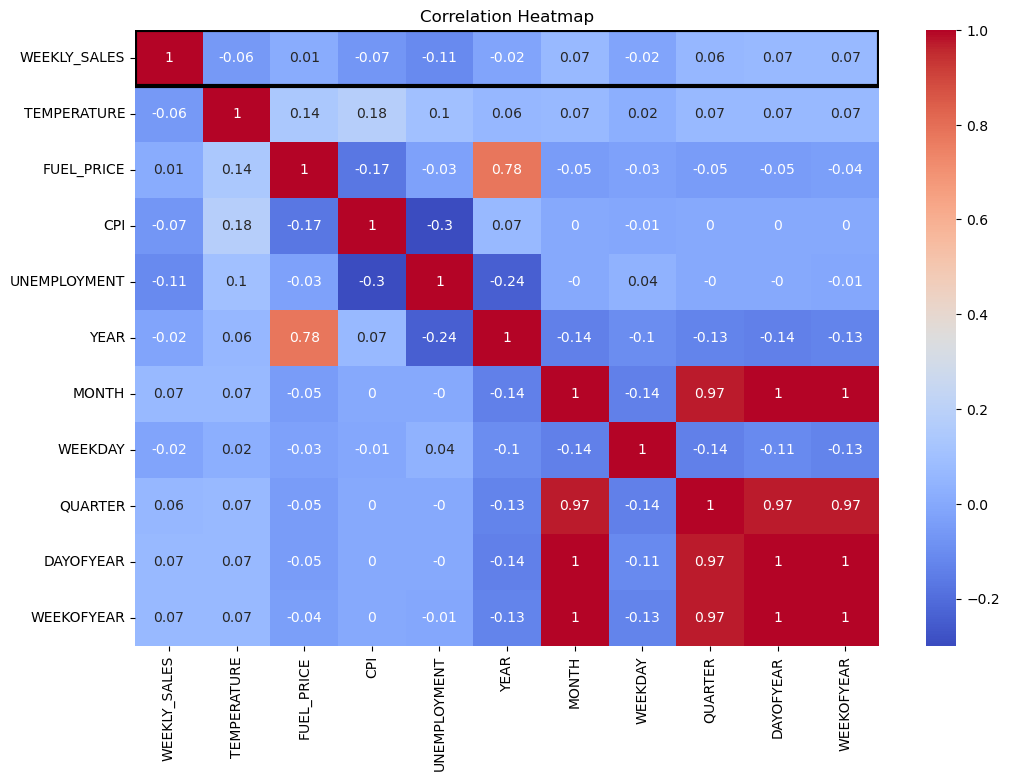

In [25]:
# Heatmap to visualize the correlation between numeric columns
#correlation_matrix = model_df.corr(numeric_only=True).round(2)
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, cmap='coolwarm')
#plt.title('Correlation Heatmap')
#plt.show()

# correlation matrix
correlation_matrix = model_df.corr(numeric_only=True).round(2)

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, cmap='coolwarm')

target_index = correlation_matrix.columns.get_loc('WEEKLY_SALES')
width = correlation_matrix.shape[0]
# highlight target variable correlations
heatmap.add_patch(plt.Rectangle((target_index, target_index), width, 1, fill=False, edgecolor='black', lw=3))

plt.title('Correlation Heatmap')

# Display the plot
plt.show()

## Modeling Preparation

### Set features and target variables

In [26]:
# set target
target = 'WEEKLY_SALES'

drop_columns = [target,'DATE']
# using all columns as features.
features = model_df.drop(columns=drop_columns).columns
# select features
#features = ['']
num_features = len(features)
print(target)
print(features)

WEEKLY_SALES
Index(['STORE', 'HOLIDAY_FLAG', 'TEMPERATURE', 'FUEL_PRICE', 'CPI',
       'UNEMPLOYMENT', 'YEAR', 'MONTH', 'WEEKDAY', 'QUARTER', 'DAYOFYEAR',
       'WEEKOFYEAR'],
      dtype='object')


## Encode columns

In [27]:

categorical_columns = model_df.select_dtypes(include='category').columns
# drop first column to avoid multicollinearity
model_df = pd.get_dummies(model_df, columns=categorical_columns, drop_first=True)

print(model_df.shape)
model_df

(6435, 57)


DATE  WEEKLY_SALES  TEMPERATURE  FUEL_PRICE         CPI  \
0    2010-01-10     283178.12        71.10       2.603  212.226946   
1    2010-01-10     566945.95        59.69       2.840  132.756800   
2    2010-01-10     481523.93        86.01       3.001  126.234600   
3    2010-01-10     224294.39        91.45       3.001  126.234600   
4    2010-01-10     422169.47        74.66       2.567  210.440443   
...         ...           ...          ...         ...         ...   
6430 2012-12-10    1409544.97        39.38       3.760  199.053937   
6431 2012-12-10     491817.19        43.26       3.760  199.053937   
6432 2012-12-10    1713889.11        76.03       4.468  131.108333   
6433 2012-12-10     697317.41        43.74       4.000  216.115057   
6434 2012-12-10    1900745.13        60.97       3.601  223.015426   

      UNEMPLOYMENT  YEAR  MONTH  WEEKDAY  QUARTER  ...  STORE_37  STORE_38  \
0            6.768  2010      1        6        1  ...         0         0   
1            8.067  2010      1        6        1  ...         0         0   
2            9.003  2010      1        6        1  ...         0         0   
3            9.265  2010      1        6        1  ...         0         0   
4            8.476  2010      1        6        1  ...         0         0   
...            ...   ...    ...      ...      ...  ...       ...       ...   
6430         6.195  2012     12        0        4  ...         0         0   
6431         5.847  2012     12        0        4  ...         0         0   
6432         6.943  2012     12        0        4  ...         0         0   
6433         7.293  2012     12        0        4  ...         0         0   
6434         6.170  2012     12        0        4  ...         0         0   

      STORE_39  STORE_40  STORE_41  STORE_42  STORE_43  STORE_44  STORE_45  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         1         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
6430         0         0         1         0         0         0         0   
6431         0         0         0         0         0         0         0   
6432         0         0         0         0         0         0         0   
6433         0         0         0         0         0         0         0   
6434         0         0         0         0         0         0         0   

      HOLIDAY_FLAG_1  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
6430               0  
6431               0  
6432               0  
6433               0  
6434               0  

[6435 rows x 57 columns]

### Standardize

In [28]:
# use to test for non standardized dataset
model_df_ns = model_df.copy()

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

standardize_columns = ['TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT']

# Create the StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected feature columns using the StandardScaler
model_df[standardize_columns] = scaler.fit_transform(model_df[standardize_columns])

# redifine features
# using all columns as features.
transformed_features = model_df.drop(columns=drop_columns).columns
num_features = len(transformed_features)

print(transformed_features)

Index(['TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT', 'YEAR', 'MONTH',
       'WEEKDAY', 'QUARTER', 'DAYOFYEAR', 'WEEKOFYEAR', 'STORE_2', 'STORE_3',
       'STORE_4', 'STORE_5', 'STORE_6', 'STORE_7', 'STORE_8', 'STORE_9',
       'STORE_10', 'STORE_11', 'STORE_12', 'STORE_13', 'STORE_14', 'STORE_15',
       'STORE_16', 'STORE_17', 'STORE_18', 'STORE_19', 'STORE_20', 'STORE_21',
       'STORE_22', 'STORE_23', 'STORE_24', 'STORE_25', 'STORE_26', 'STORE_27',
       'STORE_28', 'STORE_29', 'STORE_30', 'STORE_31', 'STORE_32', 'STORE_33',
       'STORE_34', 'STORE_35', 'STORE_36', 'STORE_37', 'STORE_38', 'STORE_39',
       'STORE_40', 'STORE_41', 'STORE_42', 'STORE_43', 'STORE_44', 'STORE_45',
       'HOLIDAY_FLAG_1'],
      dtype='object')


### Split to test and train

In [30]:
# train 80%, test will be 20%
train_size = int(len(model_df) * 0.8)
# Split the data into training and testing sets 
train_data = model_df[:train_size]
test_data = model_df[train_size:]

X_train, y_train = train_data.drop(columns=drop_columns), train_data[target]
X_test, y_test = test_data.drop(columns=drop_columns), test_data[target]

# Train and Test

## RandomForestRegressor

### Train

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest model and train on the training data
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

### Test and Check Results

In [32]:
# Make predictions on the test data
rfr_y_train_pred = model_rfr.predict(X_train)
rfr_y_test_pred = model_rfr.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for train and test
rfr_rmse_train = np.sqrt(mean_squared_error(y_train, rfr_y_train_pred))
rfr_rmse_test = np.sqrt(mean_squared_error(y_test,rfr_y_test_pred))

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
rfr_r2_train = r2_score(y_train, rfr_y_train_pred)
rfr_r2_test = r2_score(y_test, rfr_y_test_pred)

print(f'Mean Squared Error (MSE): {rfr_rmse_train}')
print(f'R-squared (R2): {rfr_r2_train}')
print(f'Mean Squared Error (MSE): {rfr_rmse_test}')
print(f'R-squared (R2): {rfr_r2_test}')

Mean Squared Error (MSE): 48967.17414266475
R-squared (R2): 0.992627623575134
Mean Squared Error (MSE): 103088.14216617848
R-squared (R2): 0.9635237401996518


### Visualize original vs predicted values

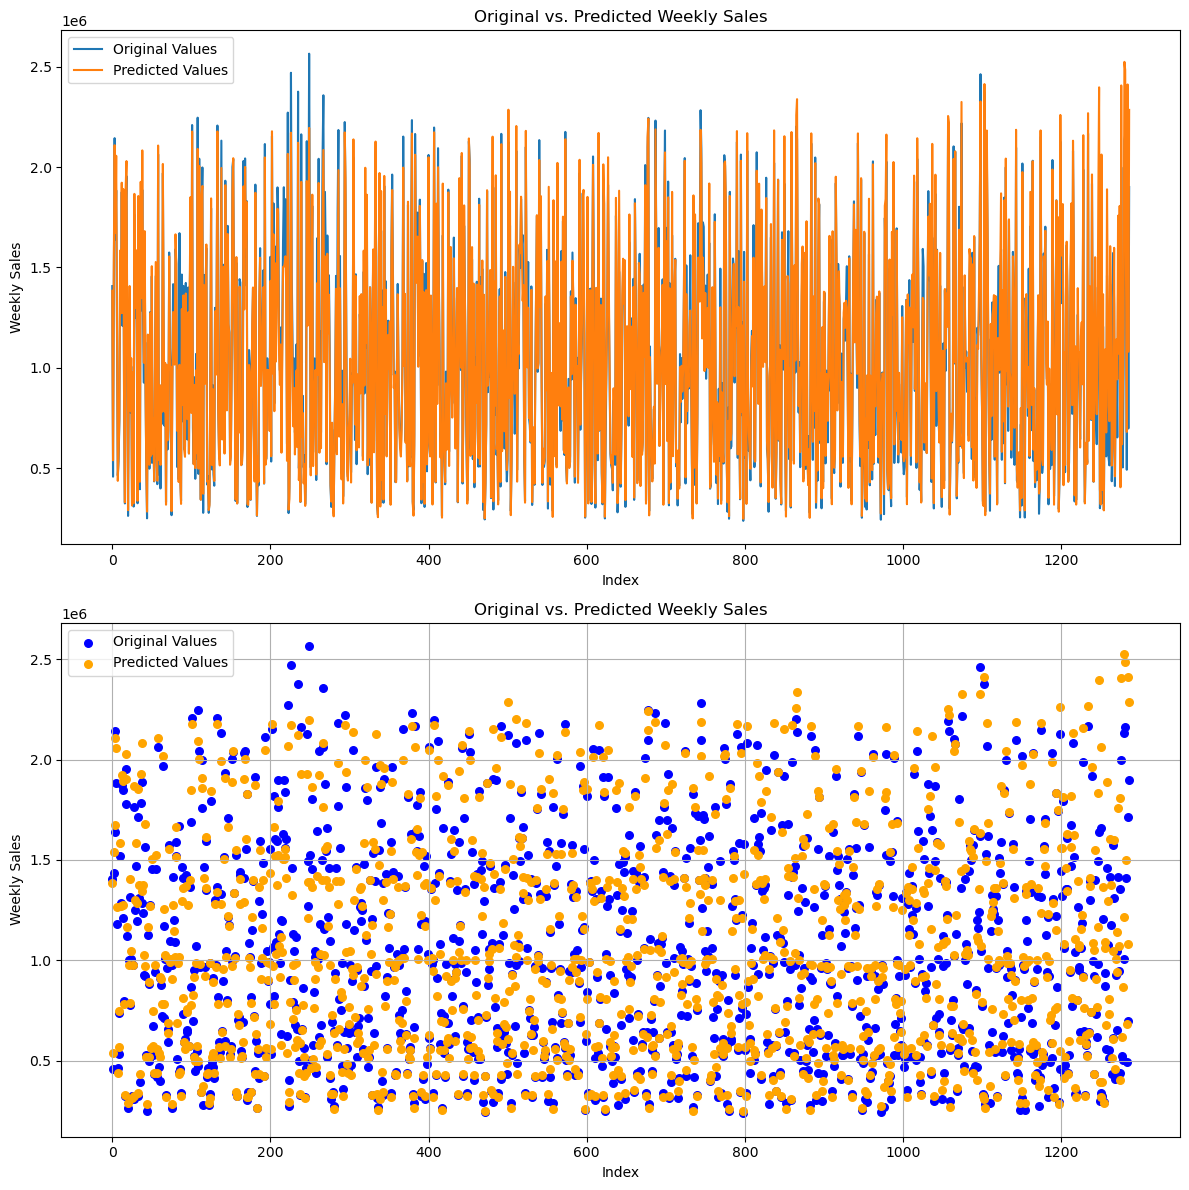

In [33]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, rfr_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, rfr_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


## Multiple Linear Regression(MLR)

### Train

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the Multiple Linear Regression model
model_mlr = LinearRegression()

# Train the model on the training data
model_mlr.fit(X_train, y_train)

# Make predictions on the training and test data
mlr_y_train_pred = model_mlr.predict(X_train)
mlr_y_test_pred = model_mlr.predict(X_test)

### Test and Check Results

In [35]:
# Calculate Root Mean Squared Error (RMSE) for train and test
mlr_rmse_train = np.sqrt(mean_squared_error(y_train, mlr_y_train_pred))
mlr_rmse_test = np.sqrt(mean_squared_error(y_test, mlr_y_test_pred))

# Calculate R-squared (R2) for evaluation
mlr_r2_train = r2_score(y_train, mlr_y_train_pred)
mlr_r2_test = r2_score(y_test, mlr_y_test_pred)

print(f'Multiple Linear Regression (MLR):')
print(f'Train - Root Mean Squared Error (RMSE): {mlr_rmse_train}')
print(f'Train - R-squared (R2): {mlr_r2_train}')
print(f'Test - Root Mean Squared Error (RMSE): {mlr_rmse_test}')
print(f'Test - R-squared (R2): {mlr_r2_test}')


Multiple Linear Regression (MLR):
Train - Root Mean Squared Error (RMSE): 159591.3303448783
Train - R-squared (R2): 0.9216902192962693
Test - Root Mean Squared Error (RMSE): 131692.7912403786
Test - R-squared (R2): 0.9404726047073346


### Visualize original vs predicted values

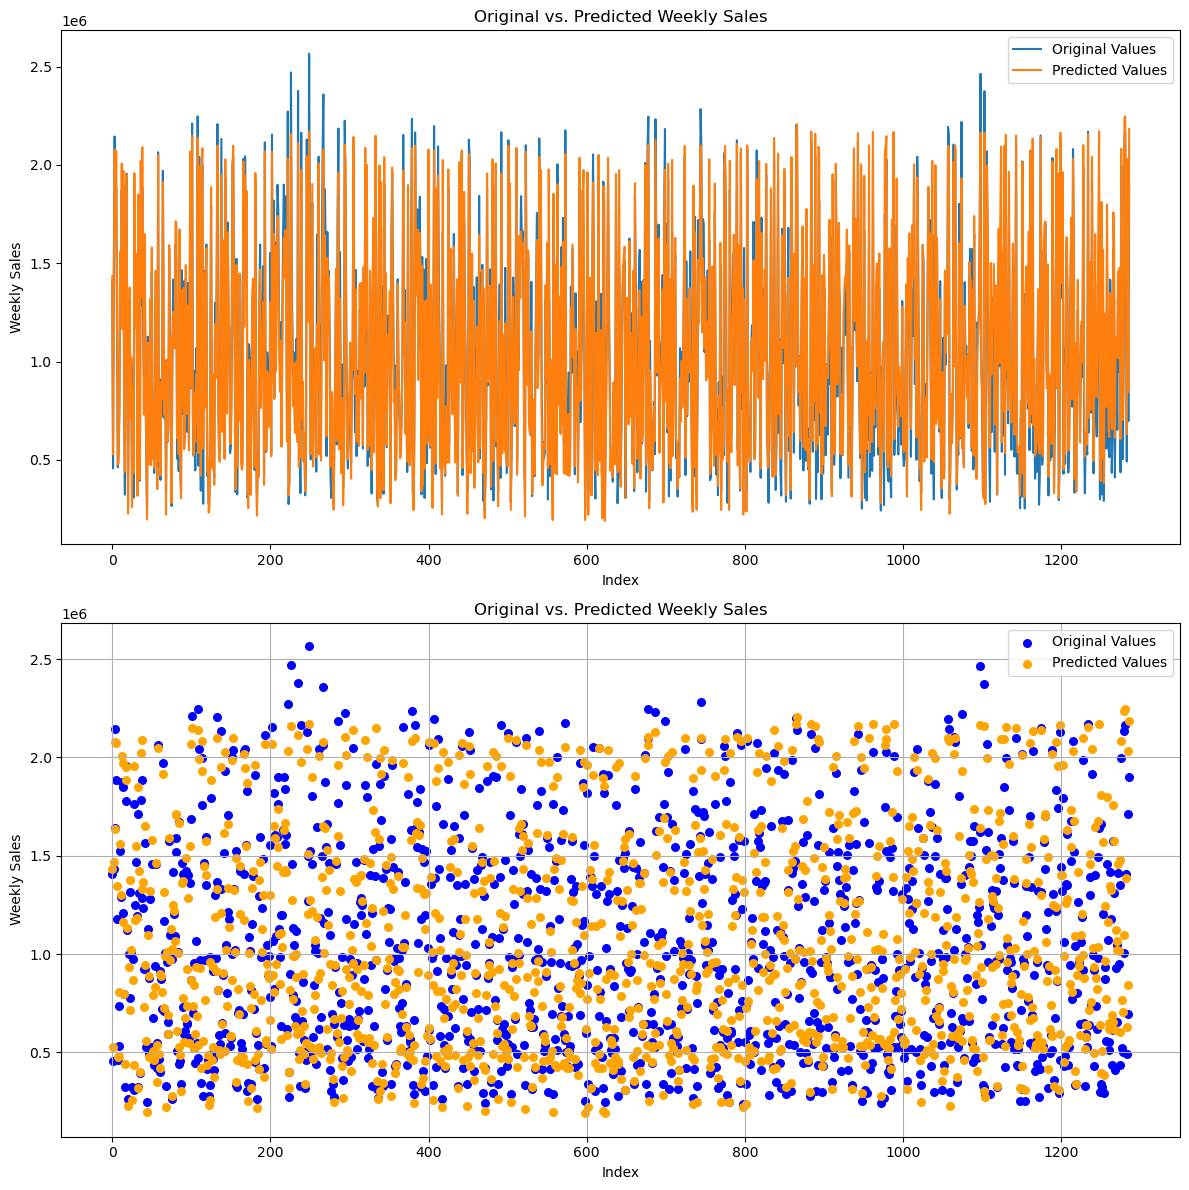

In [36]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, mlr_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, mlr_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


## Ridge Regression

### Train

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create the Ridge Regression model
model_ridge = Ridge(alpha=1.0)  # You can adjust the value of alpha for different regularization strengths

# Train the model on the training data
model_ridge.fit(X_train, y_train)

# Make predictions on the training and test data
ridge_y_train_pred = model_ridge.predict(X_train)
ridge_y_test_pred = model_ridge.predict(X_test)

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create the Elastic-Net Regression model
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the values of alpha and l1_ratio for different regularization strengths


### Test and Check Results

In [38]:
# Calculate Root Mean Squared Error (RMSE) for train and test
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_y_train_pred))
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_y_test_pred))

# Calculate R-squared (R2) for evaluation
ridge_r2_train = r2_score(y_train, ridge_y_train_pred)
ridge_r2_test = r2_score(y_test, ridge_y_test_pred)

print(f'Ridge Regression:')
print(f'Train - Root Mean Squared Error (RMSE): {ridge_rmse_train}')
print(f'Train - R-squared (R2): {ridge_r2_train}')
print(f'Test - Root Mean Squared Error (RMSE): {ridge_rmse_test}')
print(f'Test - R-squared (R2): {ridge_r2_test}')

Ridge Regression:
Train - Root Mean Squared Error (RMSE): 161655.04338203682
Train - R-squared (R2): 0.9196518401878837
Test - Root Mean Squared Error (RMSE): 120725.38213326992
Test - R-squared (R2): 0.9499746596645503


### Visualize original vs predicted values

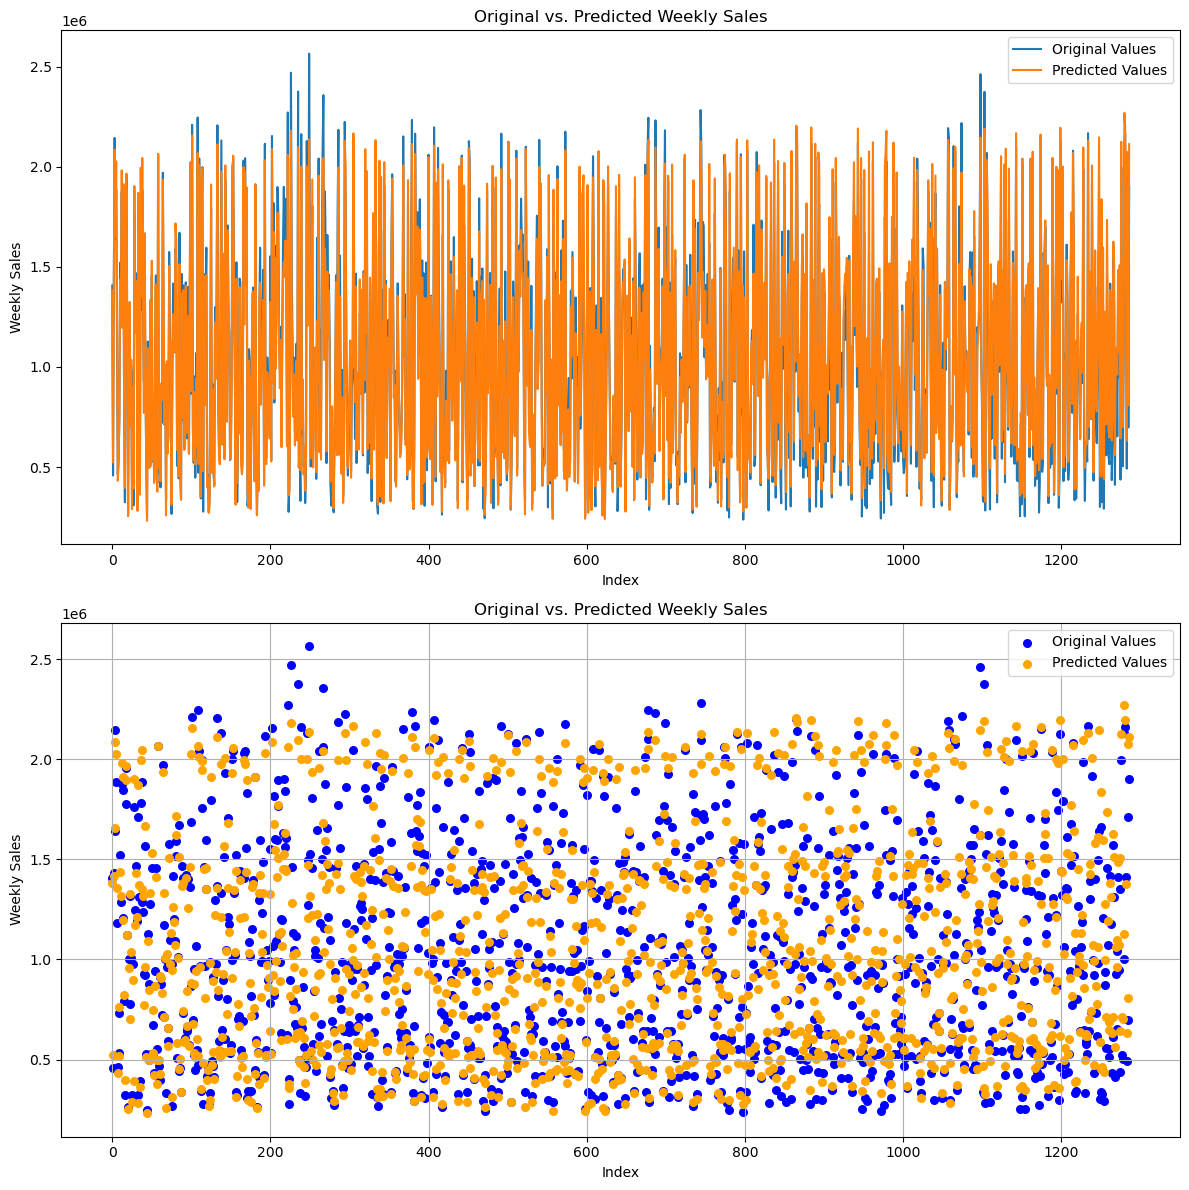

In [39]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, ridge_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, ridge_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


## Elastic-Net Regression

### Train

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create the Elastic-Net Regression model
model_en = ElasticNet(alpha=0.5, l1_ratio=0.5) 

# Train the model on the training data
model_en.fit(X_train, y_train)

# Make predictions on the training and test data
en_y_train_pred = model_en.predict(X_train)
en_y_test_pred = model_en.predict(X_test)

### Test and Check Results

In [41]:
# Calculate Root Mean Squared Error (RMSE) for train and test
en_rmse_train = np.sqrt(mean_squared_error(y_train, en_y_train_pred))
en_rmse_test = np.sqrt(mean_squared_error(y_test, en_y_test_pred))

# Calculate R-squared (R2) for evaluation
en_r2_train = r2_score(y_train, en_y_train_pred)
en_r2_test = r2_score(y_test, en_y_test_pred)

print(f'Elastic-Net Regression:')
print(f'Train - Root Mean Squared Error (RMSE): {en_rmse_train}')
print(f'Train - R-squared (R2): {en_r2_train}')
print(f'Test - Root Mean Squared Error (RMSE): {en_rmse_test}')
print(f'Test - R-squared (R2): {en_r2_test}')

Elastic-Net Regression:
Train - Root Mean Squared Error (RMSE): 520580.0442389674
Train - R-squared (R2): 0.16675551142406864
Test - Root Mean Squared Error (RMSE): 493452.02264152246
Test - R-squared (R2): 0.16423776830559933


### Visualize original vs predicted values

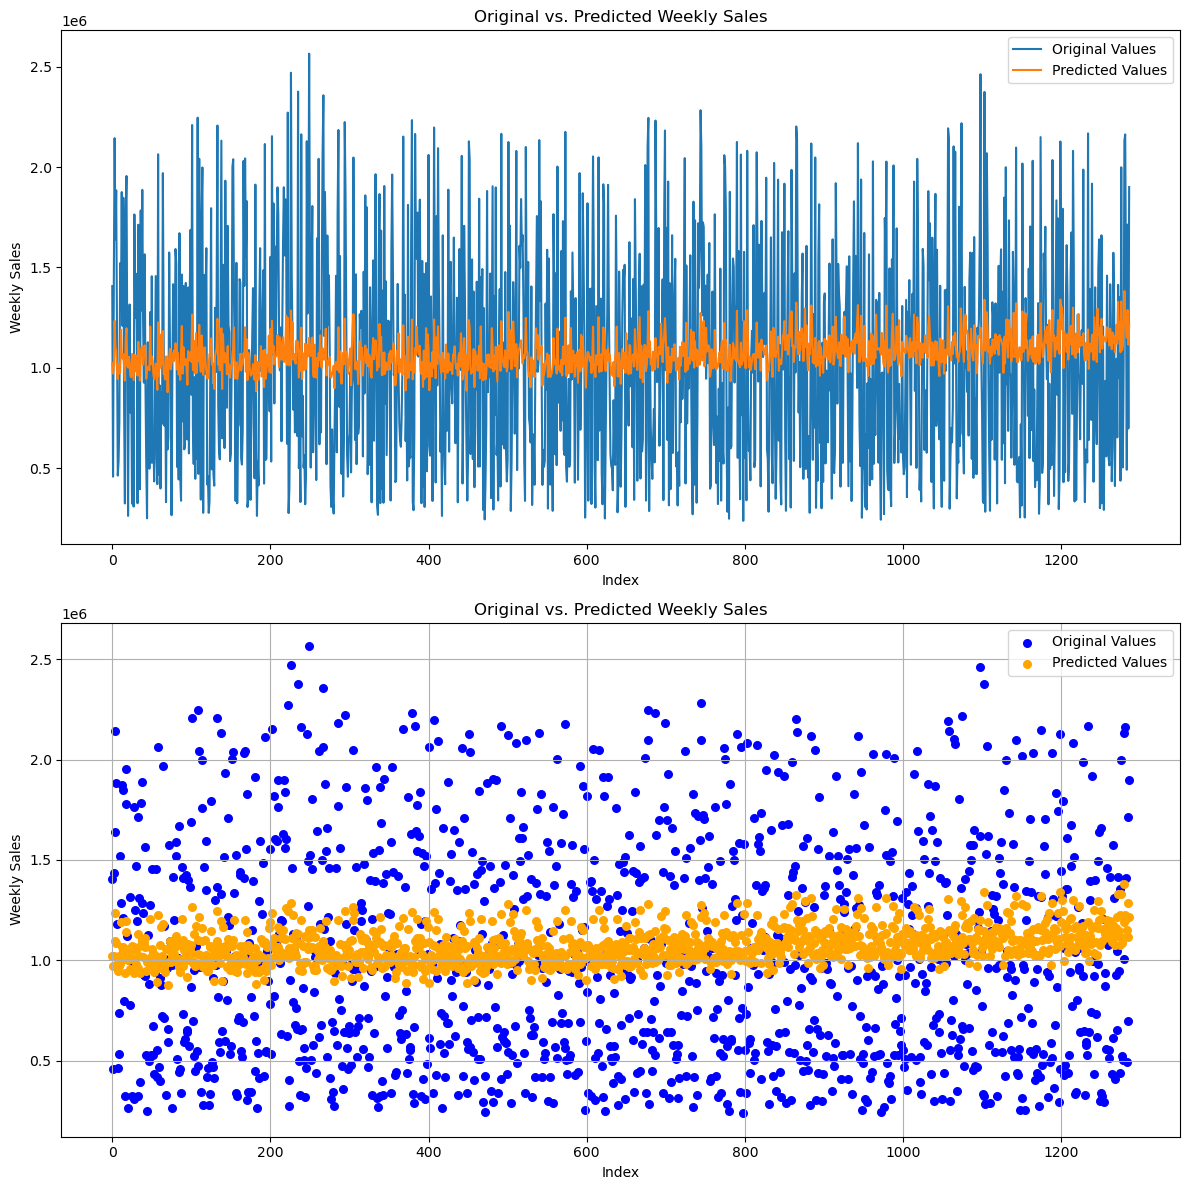

In [42]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, en_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, en_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


# Time Series Analysis

In [43]:
# make a copy of the data
model_df_ts = walmart_df.copy()
# create an aggregated (by date) copy
aggregated_sales = model_df_ts.groupby('DATE')['WEEKLY_SALES'].sum()
# aggregated_sales = aggregated_sales.reset_index()

In [44]:
model_df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          6435 non-null   datetime64[ns]
 1   STORE         6435 non-null   int64         
 2   WEEKLY_SALES  6435 non-null   float64       
 3   HOLIDAY_FLAG  6435 non-null   int64         
 4   TEMPERATURE   6435 non-null   float64       
 5   FUEL_PRICE    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   UNEMPLOYMENT  6435 non-null   float64       
 8   YEAR          6435 non-null   int64         
 9   MONTH         6435 non-null   int64         
 10  WEEKDAY       6435 non-null   int64         
 11  QUARTER       6435 non-null   int64         
 12  DAYOFYEAR     6435 non-null   int64         
 13  WEEKOFYEAR    6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(7)
memory usage: 685.1 KB


In [45]:
model_df_ts

DATE  STORE  WEEKLY_SALES  HOLIDAY_FLAG  TEMPERATURE  FUEL_PRICE  \
0    2010-01-10      5     283178.12             0        71.10       2.603   
1    2010-01-10     15     566945.95             0        59.69       2.840   
2    2010-01-10     42     481523.93             0        86.01       3.001   
3    2010-01-10     33     224294.39             0        91.45       3.001   
4    2010-01-10     36     422169.47             0        74.66       2.567   
...         ...    ...           ...           ...          ...         ...   
6430 2012-12-10     41    1409544.97             0        39.38       3.760   
6431 2012-12-10     16     491817.19             0        43.26       3.760   
6432 2012-12-10     10    1713889.11             0        76.03       4.468   
6433 2012-12-10     25     697317.41             0        43.74       4.000   
6434 2012-12-10      2    1900745.13             0        60.97       3.601   

             CPI  UNEMPLOYMENT  YEAR  MONTH  WEEKDAY  QUARTER  DAYOFYEAR  \
0     212.226946         6.768  2010      1        6        1         10   
1     132.756800         8.067  2010      1        6        1         10   
2     126.234600         9.003  2010      1        6        1         10   
3     126.234600         9.265  2010      1        6        1         10   
4     210.440443         8.476  2010      1        6        1         10   
...          ...           ...   ...    ...      ...      ...        ...   
6430  199.053937         6.195  2012     12        0        4        345   
6431  199.053937         5.847  2012     12        0        4        345   
6432  131.108333         6.943  2012     12        0        4        345   
6433  216.115057         7.293  2012     12        0        4        345   
6434  223.015426         6.170  2012     12        0        4        345   

      WEEKOFYEAR  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
6430          50  
6431          50  
6432          50  
6433          50  
6434          50  

[6435 rows x 14 columns]

## Exploratory Data Analysis (EDA) for Time Series

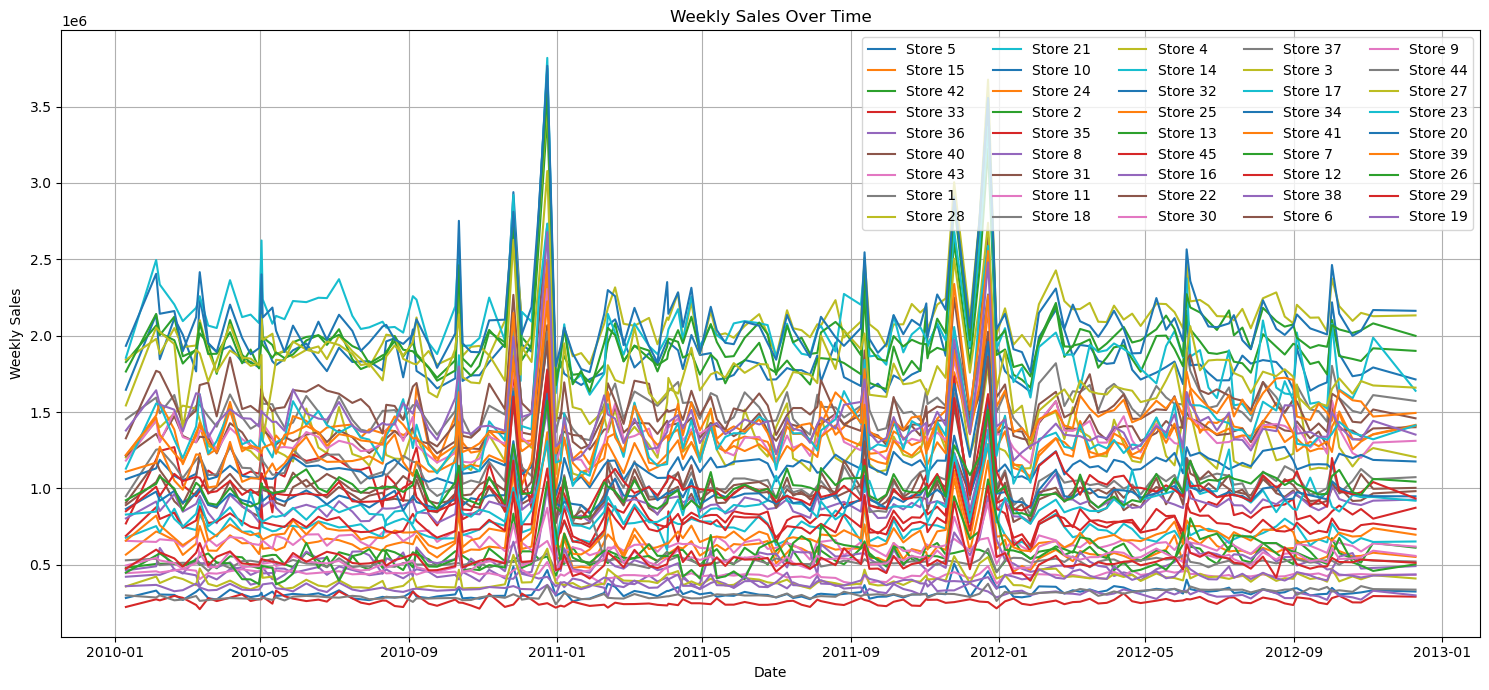

In [46]:
# plot weekly sales by store
plt.figure(figsize=(15, 7))
for store in model_df_ts['STORE'].unique():
    subset = model_df_ts[model_df_ts['STORE'] == store]
    plt.plot(subset['DATE'], subset['WEEKLY_SALES'], label=f'Store {store}')

plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(loc='upper right', ncol=5)  # Adjust ncol based on number of stores
plt.grid(True)
plt.tight_layout()
plt.show()

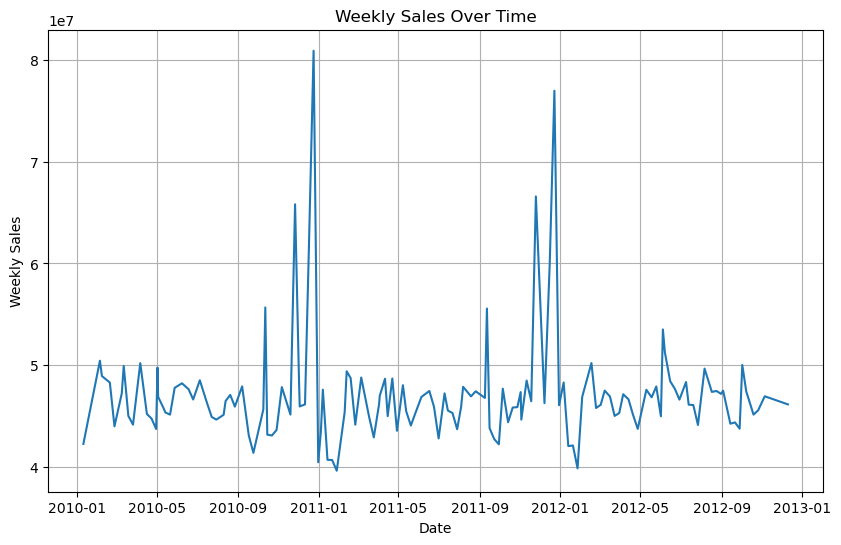

In [47]:
# Plot weekly sales
plt.figure(figsize=(10, 6))
plt.plot(aggregated_sales)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.grid(True)
plt.show()

### Seasonal Decomposition
Decompose our time series into three distinct components: trend, seasonality, and noise.

#### Default - Weekly Sales is By Store

<Figure size 1200x800 with 0 Axes>

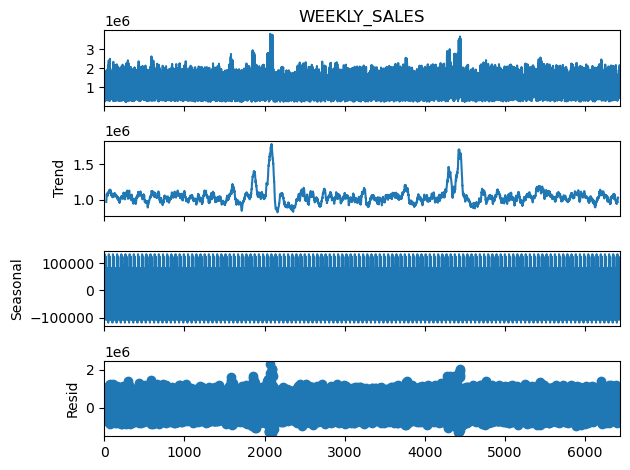

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decompose_result = seasonal_decompose(model_df_ts['WEEKLY_SALES'], model='additive', period=52)  # using a yearly frequency

# Plotting the decomposed time series
plt.figure(figsize=(12, 8))
decompose_result.plot()
plt.show()

#### Overall - Weekly Sales Summed by Date

Trend values:
 DATE
2010-08-10    4.730638e+07
2010-08-13    4.723247e+07
2010-08-20    4.718849e+07
2010-08-27    4.719726e+07
2010-09-04    4.720299e+07
2010-09-07    4.721968e+07
2010-09-17    4.718642e+07
2010-09-24    4.711767e+07
2010-10-09    4.711677e+07
2010-10-12    4.710534e+07
2010-10-15    4.710788e+07
2010-10-22    4.714356e+07
2010-10-29    4.719366e+07
2010-11-06    4.718165e+07
2010-11-19    4.713283e+07
Name: trend, dtype: float64

Seasonal values:
 DATE
2010-01-10   -3.950325e+06
2010-02-04    5.905213e+05
2010-02-07    3.795128e+05
2010-02-19    1.913414e+05
2010-02-26   -1.396124e+06
2010-03-09    6.668816e+05
2010-03-12   -2.222910e+06
2010-03-19   -3.126175e+06
2010-03-26   -6.121471e+05
2010-04-06   -4.036800e+05
2010-04-16   -3.053943e+05
2010-04-23   -2.854434e+06
2010-04-30    8.914712e+05
2010-05-02   -3.368352e+06
2010-05-03    1.126588e+06
Name: seasonal, dtype: float64

Residual values:
 DATE
2010-08-10   -6.395638e+05
2010-08-13   -8.496977e+05
2010-08-2

<Figure size 1200x800 with 0 Axes>

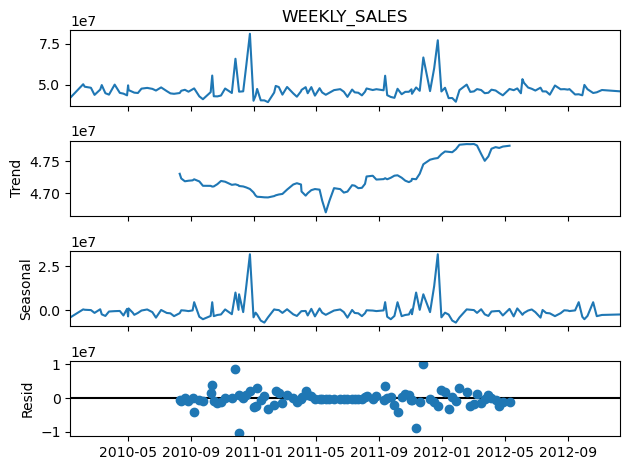

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
aggregated_sales_result = seasonal_decompose(aggregated_sales, model='additive', period=52)  # using a yearly frequency

# Getting the numeric values
trend = aggregated_sales_result.trend
seasonal = aggregated_sales_result.seasonal
residual = aggregated_sales_result.resid

# Printing the first few values for verification
print("Trend values:\n", trend.dropna().head(15))
print("\nSeasonal values:\n", seasonal.head(15))
print("\nResidual values:\n", residual.dropna().head(15))

# Plotting the decomposed time series
plt.figure(figsize=(12, 8))
aggregated_sales_result.plot()
plt.show()

* The trend values for the given period seem relatively stable. This might suggest that, at a macro level, sales do not exhibit any significant growth or decline during these dates.
* The seasonal component displays fluctuations in weekly sales throughout the year. There are noticeable peaks and valleys, indicating specific periods when sales are consistently higher or lower than the average.
* The residuals show significant variations, indicating that there are other factors, not captured by the trend and seasonality, affecting the sales.

Given the observed stability in the trend values and evident seasonality in the dataset, a time series model that accounts for both trend and seasonality would be apt. The SARIMA (Seasonal Autoregressive Integrated Moving Average) model would likely be a suitable fit since it considers seasonality.  
Additionally, the irregularities and noise captured in the residual component suggest that models like Holt-Winters, which can handle both trend and seasonality, might also be effective. ARIMA, while powerful, might be less fitting

### Stationarity Check

In [50]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Apply ADF test on the series
adf_test(aggregated_sales)

Results of Dickey-Fuller Test:
Test Statistic                -9.837722e+00
p-value                        4.845103e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


### Making the Time Series Stationary
Not necessary. Will be use to test if needed.

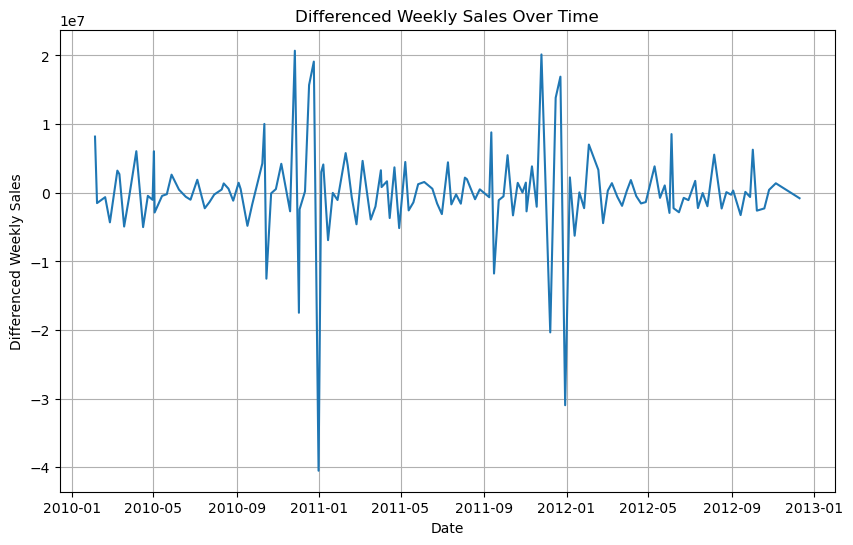

Results of Dickey-Fuller Test:
Test Statistic                -6.327363e+00
p-value                        2.963729e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.320000e+02
Critical Value (1%)           -3.480888e+00
Critical Value (5%)           -2.883697e+00
Critical Value (10%)          -2.578586e+00
dtype: float64


In [51]:
# Differencing the series
weekly_sales_diff = aggregated_sales.diff().dropna()

# Plot differenced series
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_diff)
plt.xlabel('Date')
plt.ylabel('Differenced Weekly Sales')
plt.title('Differenced Weekly Sales Over Time')
plt.grid(True)
plt.show()

# Apply ADF test on the differenced series
adf_test(weekly_sales_diff)

### Autocorrelation and Partical Autocorrelation Plot

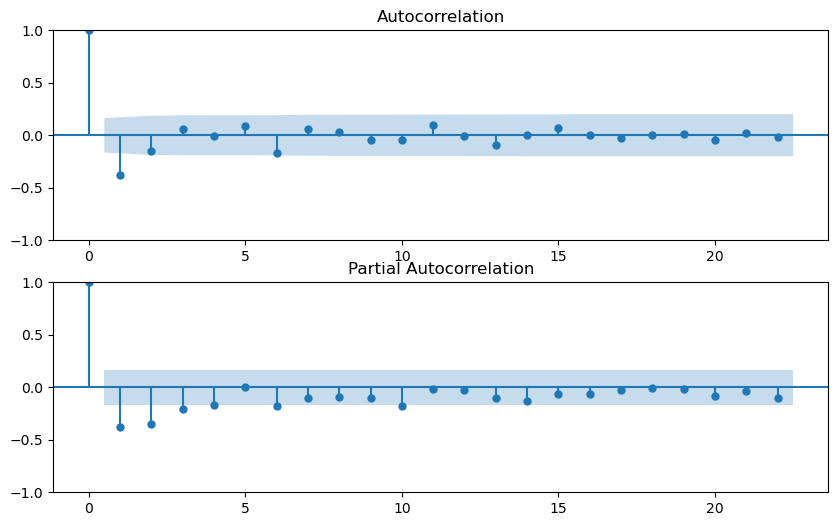

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation plot
fig, ax = plt.subplots(2, figsize=(10, 6))
plot_acf(weekly_sales_diff, ax=ax[0])
plot_pacf(weekly_sales_diff, ax=ax[1])
plt.show()

# ARIMA

In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(aggregated_sales, order=(1, 0, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           WEEKLY_SALES   No. Observations:                  143
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2416.513
Date:                Wed, 09 Aug 2023   AIC                           4843.026
Time:                        14:32:20   BIC                           4857.840
Sample:                             0   HQIC                          4849.045
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   1.99e-08   2.36e+15      0.000    4.71e+07    4.71e+07
ar.L1         -0.8714      0.169     -5.160      0.000      -1.202      -0.540
ma.L1          1.0838      0.182      5.950      0.0

* The ARIMA(1, 0, 2) model effectively captures the autocorrelation in the data, as evidenced by the high Prob(Q) value of 0.98.
*  Residuals exhibit non-normality with a Jarque-Bera Prob(JB) of 0.00, suggesting potential model inadequacies or outliers.
* Warnings about the covariance matrix's stability indicate potential issues with the reliability of parameter estimates.

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_size = int(len(aggregated_sales) * 0.8)
train = aggregated_sales[:train_size] 
test = aggregated_sales[train_size:]

# Fit the model to the training data
model = ARIMA(aggregated_sales, order=(1,1,1))
model_fit = model.fit()

# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE and R^2
rmse = sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 2211099.9575724658
R^2: 0.009079414505011596


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


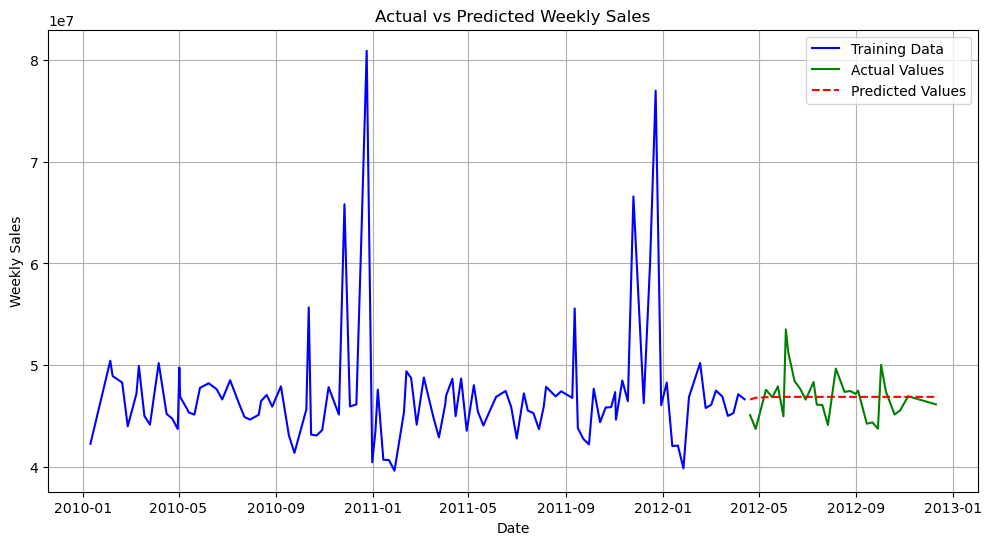

In [55]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Values', color='green')
plt.plot(test.index, forecast, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Try to optimize

In [57]:
from pmdarima import auto_arima

# Find the best ARIMA parameters
best_model = auto_arima(aggregated_sales, seasonal=True, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)

print(best_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4844.973, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4844.691, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4841.703, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4841.471, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4843.733, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4843.486, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4845.479, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5366.050, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.780 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2417.736
Date:                Wed, 09 Aug 2023   AIC      

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_size = int(len(aggregated_sales) * 0.8)
train = aggregated_sales[:train_size] 
test = aggregated_sales[train_size:]

# Fit the model to the training data
model = ARIMA(aggregated_sales, order=(0,0,1))
model_fit = model.fit()

# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE and R^2
rmse = sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 2223915.1449004123
R^2: -0.002440311778784121


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Worse than than previous ARIMA model

### Exploring just the Seasonality

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

seasonal = aggregated_sales_result.seasonal

# Build a model for the seasonal component
seasonal_model = ExponentialSmoothing(seasonal, seasonal='add', seasonal_periods=52)
seasonal_fit = seasonal_model.fit()

# Forecast the seasonal component
seasonal_forecast = seasonal_fit.forecast(len(seasonal))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


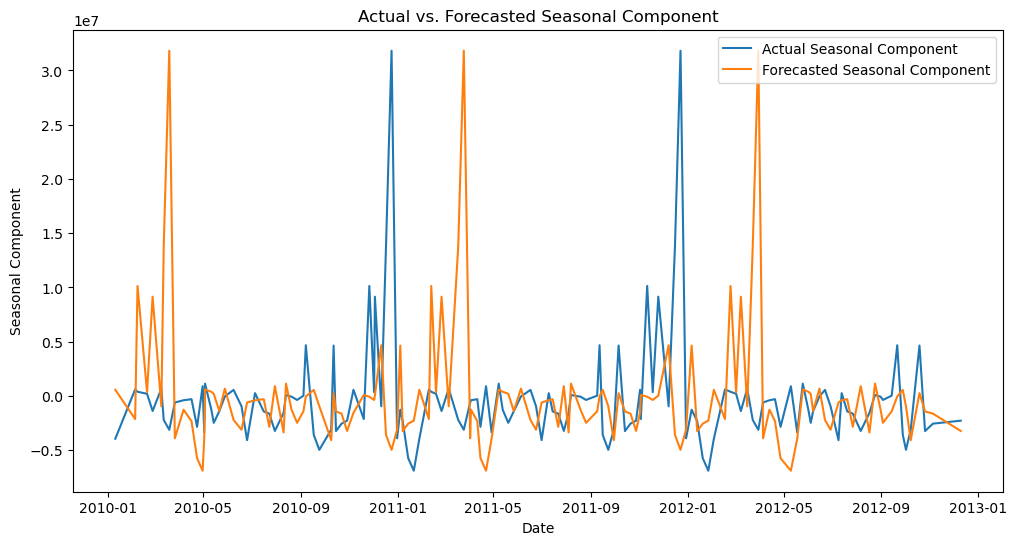

In [60]:

# Plot the original data and the seasonal forecast
plt.figure(figsize=(12, 6))
plt.plot(aggregated_sales.index, seasonal, label='Actual Seasonal Component')
plt.plot(aggregated_sales.index, seasonal_forecast, label='Forecasted Seasonal Component')
plt.legend()
plt.title('Actual vs. Forecasted Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


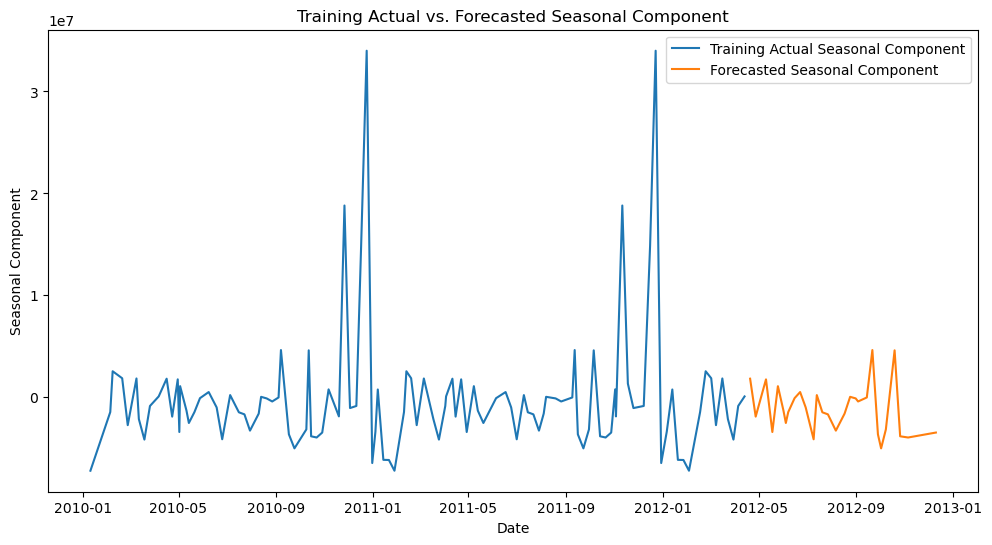

RMSE: 48181018.26393764
R-squared: -469.51562101516913


In [61]:

# Create a DataFrame with DATE and WEEKLY_SALES
overall_sales = model_df_ts.groupby('DATE')['WEEKLY_SALES'].sum().reset_index()

# Convert the DATE column to datetime if it's not already
overall_sales['DATE'] = pd.to_datetime(overall_sales['DATE'])

# Set DATE column as the index
overall_sales.set_index('DATE', inplace=True)

# Split the data into train and test sets
train_size = int(len(overall_sales) * 0.8)  # 80% for training
train_data = overall_sales.iloc[:train_size]
test_data = overall_sales.iloc[train_size:]

# Perform seasonal decomposition on the training data
seasonal_decomposition = seasonal_decompose(train_data['WEEKLY_SALES'], model='additive', period=52)

# Access the seasonal component
seasonal = seasonal_decomposition.seasonal

# Build a model for the seasonal component
seasonal_model = ExponentialSmoothing(seasonal, seasonal='add', seasonal_periods=52)
seasonal_fit = seasonal_model.fit()

# Forecast the seasonal component on the test data
seasonal_forecast = seasonal_fit.forecast(len(test_data))

# Calculate RMSE and R2
rmse = np.sqrt(mean_squared_error(test_data['WEEKLY_SALES'], seasonal_forecast))
r2 = r2_score(test_data['WEEKLY_SALES'], seasonal_forecast)

# Plot the actual seasonal component and forecasted seasonal component
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, seasonal, label='Training Actual Seasonal Component')
plt.plot(test_data.index, seasonal_forecast, label='Forecasted Seasonal Component')
plt.legend()
plt.title('Training Actual vs. Forecasted Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


## SARIMAX
With external regressors. To account for external factors

Using the Parameters from a Grid search for the optimal SARIMA parameters. Which is run on a different notebook as it takes 

* CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
* Best SARIMA Order: (0, 0, 0) x (1, 1, 1, 52)
* Best AIC: 148673.2438237391

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28840D+00    |proj g|=  1.59188D-02


 This problem is unconstrained.



At iterate    5    f=  1.28296D+00    |proj g|=  1.75575D-02

At iterate   10    f=  1.28258D+00    |proj g|=  1.23053D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     38      1     0     0   1.231D-05   1.283D+00
  F =   1.2825780483028013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Best SARIMAX Order: (0, 0, 0) x (1, 1, 1, 52)
Mean Squared Error (MSE): 11221494324202.172
R-squared (R2): -1.2744311370268613


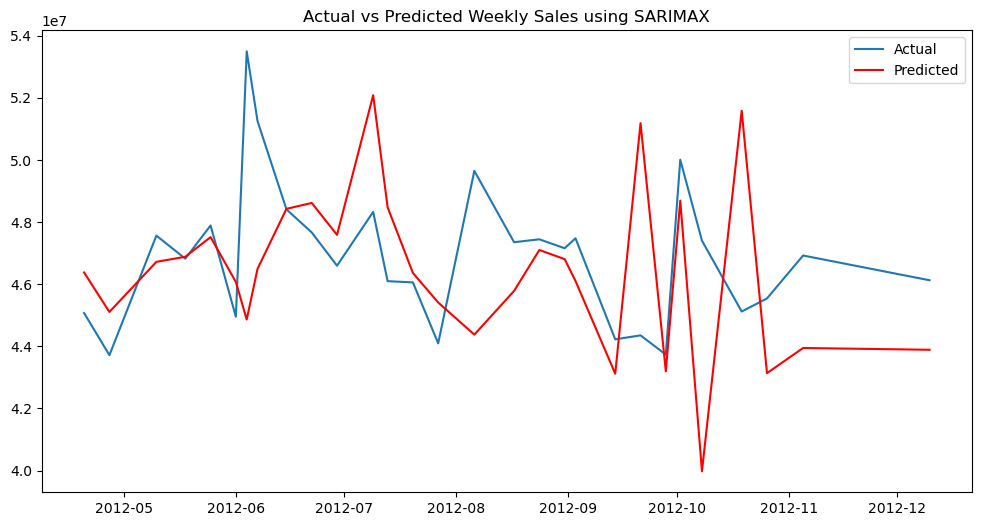

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Group by DATE and aggregate columns
aggregation = {
    'WEEKLY_SALES': 'sum',  
    'HOLIDAY_FLAG': 'max',  
    'TEMPERATURE': 'mean',  
    'FUEL_PRICE': 'mean',
    'CPI': 'mean',
    'UNEMPLOYMENT': 'mean'
}

# Perform the groupby and aggregation
overall_sales = model_df_ts.groupby('DATE').agg(aggregation).reset_index()

# Convert the DATE column to datetime if it's not already
overall_sales['DATE'] = pd.to_datetime(overall_sales['DATE'])

# Set DATE column as the index
overall_sales.set_index('DATE', inplace=True)

# Split the data into train and test sets
train_size = int(len(overall_sales) * 0.8)  # 80% for training
train_data = overall_sales.iloc[:train_size]
test_data = overall_sales.iloc[train_size:]

# Use the best SARIMAX order obtained previously
best_order = (0, 0, 0)
best_seasonal_order = (1, 1, 1, 52)

# Build the SARIMAX model using the best order and seasonal_order
best_model = SARIMAX(train_data['WEEKLY_SALES'], exog=train_data[['HOLIDAY_FLAG', 'TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT']],
                     order=best_order, seasonal_order=best_seasonal_order,
                     enforce_stationarity=False, enforce_invertibility=False)
best_results = best_model.fit()

# Use the best model to make predictions
predictions = best_results.forecast(steps=len(test_data), exog=test_data[['HOLIDAY_FLAG', 'TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT']])

# Calculate MSE and R2
mse = mean_squared_error(test_data['WEEKLY_SALES'], predictions)
r2 = r2_score(test_data['WEEKLY_SALES'], predictions)

print(f"Best SARIMAX Order: {best_order} x {best_seasonal_order}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['WEEKLY_SALES'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Weekly Sales using SARIMAX')
plt.legend()
plt.show()


Best SARIMAX Order: (0, 0, 0) x (1, 1, 1, 52)  
Mean Squared Error (MSE): 11221494324202.172

## LSTMs

In [63]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

data = model_df_ts['WEEKLY_SALES'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset with timesteps
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
200/200 [==============================] - 17s 60ms/step - loss: 0.0259
Epoch 2/50
200/200 [==============================] - 12s 58ms/step - loss: 0.0246
Epoch 3/50
200/200 [==============================] - 12s 58ms/step - loss: 0.0246
Epoch 4/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0245
Epoch 5/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0245
Epoch 6/50
200/200 [==============================] - 12s 58ms/step - loss: 0.0245
Epoch 7/50
200/200 [==============================] - 12s 58ms/step - loss: 0.0244
Epoch 8/50
200/200 [==============================] - 11s 57ms/step - loss: 0.0244
Epoch 9/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0244
Epoch 10/50
200/200 [==============================] - 11s 57ms/step - loss: 0.0245
Epoch 11/50
200/200 [==============================] - 12s 58ms/step - loss: 0.0245
Epoch 12/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0244
E

200/200 [==============================] - 5s 19ms/step
Mean Absolute Error (MAE) for LSTM: 462114.6144686275
RMSE for Prophet: 557239.8134680233
R2 Score for Prophet: 0.02601013067660929


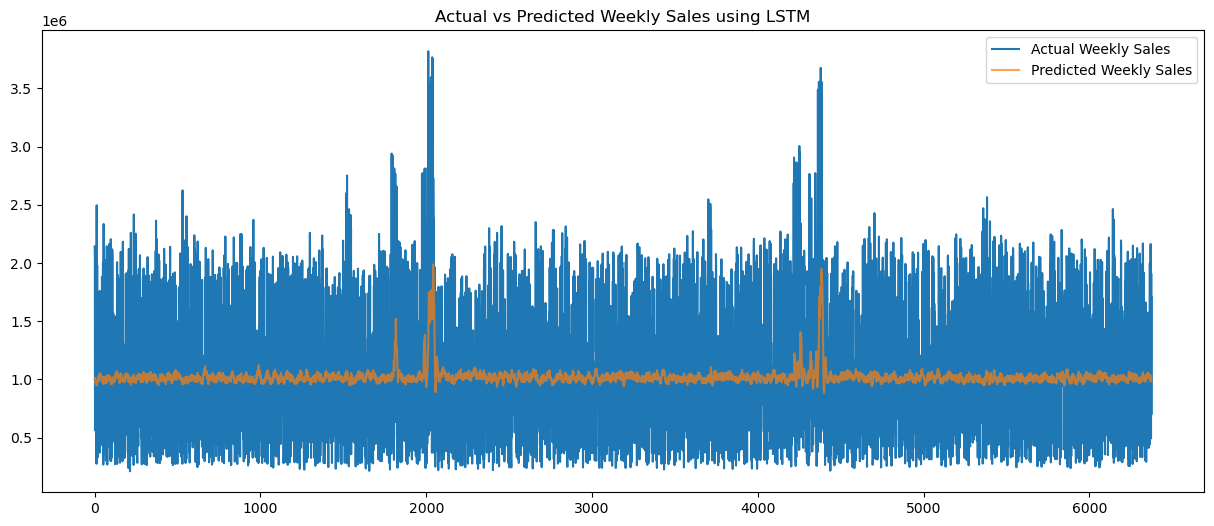

In [64]:
# Making predictions
predicted_sales = model.predict(X)
predicted_sales = scaler.inverse_transform(predicted_sales)

# Inverse transform the actual values
actual_sales = scaler.inverse_transform(y.reshape(-1, 1))

# Compute evaluation metric (e.g., MAE)
mae = mean_absolute_error(actual_sales, predicted_sales)
print(f"Mean Absolute Error (MAE) for LSTM: {mae}")
# Compute RMSE and r2 score for Prophet
rmse_prophet = np.sqrt(mean_squared_error(actual_sales, predicted_sales))
r2_prophet = r2_score(actual_sales, predicted_sales)
print(f"RMSE for Prophet: {rmse_prophet}")
print(f"R2 Score for Prophet: {r2_prophet}")

# Plotting actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(actual_sales, label='Actual Weekly Sales')
plt.plot(predicted_sales, label='Predicted Weekly Sales', alpha=0.7)
plt.title('Actual vs Predicted Weekly Sales using LSTM')
plt.legend()
plt.show()